In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd
import re
import seaborn as sns
from matplotlib_venn import venn3
import gc

In [ ]:
df_labels = pd.read_csv('/path/to/aaer_mark5.csv', sep=';')

# Descriptive stats

### Loading both Full and Filtered Dataset

In [ ]:
df = pd.read_csv('amalgamated_dataframe.csv')

/var/folders/zn/yk0_6g0j1yq_84_qjqk0dcnw0000gn/T/ipykernel_1022/3283687850.py:1: DtypeWarning: Columns (15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fraud.csv')


In [12]:
print(df.shape[0])

89453


In [5]:
df['reporting_date'] = pd.to_datetime(df['reporting_date'])
df['year'] = df['reporting_date'].dt.year

In [ ]:
df_text = pd.read_csv('amalgamated_filtered_dataframe.csv')

/var/folders/zn/yk0_6g0j1yq_84_qjqk0dcnw0000gn/T/ipykernel_1022/2138857746.py:1: DtypeWarning: Columns (15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_text = pd.read_csv('fraud_text.csv')


In [8]:
df_text['reporting_date'] = pd.to_datetime(df_text['reporting_date'])
df_text['year'] = df_text['reporting_date'].dt.year

In [13]:
print(df_text.shape[0])

68894


### Full Dataset Fraud Count per Year

In [6]:
summary = df.groupby('year').agg(
    fraudulent_count=('fraudulent', 'sum'),
    total_count=('fraudulent', 'count')
)

summary['fraudulent_fraction'] = (summary['fraudulent_count'] / summary['total_count']).round(3)

In [8]:
summary

,fraudulent_count,total_count,fraudulent_fraction
year,,,
1992,0,6,0.000
1993,8,370,0.022
1994,15,496,0.030
1995,24,1039,0.023
1996,60,1597,0.038
1997,101,1771,0.057
1998,120,1806,0.066
1999,162,1926,0.084
2000,204,2058,0.099


In [ ]:
print(summary.to_latex(index=True, caption='Fraudulent Case Summary by Year (Full Dataset)', label='tab:summary_full'))

### Filtered Dataset Fraud Count per Year

In [9]:
summary_text = df_text.groupby('year').agg(
    fraudulent_count=('fraudulent', 'sum'),
    total_count=('fraudulent', 'count')
)

summary_text['fraudulent_fraction'] = (summary_text['fraudulent_count'] / summary_text['total_count']).round(3)

In [10]:
summary_text

,fraudulent_count,total_count,fraudulent_fraction
year,,,
1993,0,113,0.000
1994,3,147,0.020
1995,9,410,0.022
1996,27,730,0.037
1997,47,849,0.055
1998,59,955,0.062
1999,79,1053,0.075
2000,99,1171,0.085
2001,114,1230,0.093


In [ ]:
print(summary_text.to_latex(index=True, caption='Fraudulent Case Summary by Year (Filtered Dataset)', label='tab:summary_filtered'))

### Global Fraud Distribution of both Datasets

In [15]:
# Number of fraud cases
print(df['fraudulent'].value_counts())
# proportion of fraud cases
print(df['fraudulent'].value_counts(normalize=True))

fraudulent
0    86855
1     2598
Name: count, dtype: int64
fraudulent
0    0.970957
1    0.029043
Name: proportion, dtype: float64


In [16]:
# Number of fraud cases
print(df_text['fraudulent'].value_counts())
# proportion of fraud cases
print(df_text['fraudulent'].value_counts(normalize=True))

fraudulent
0    67298
1     1596
Name: count, dtype: int64
fraudulent
0    0.976834
1    0.023166
Name: proportion, dtype: float64


### Firm Data
on full dataset

In [22]:
# Number of Firms
print(df['cik'].nunique())
# most represented firm
print(df['cik'].value_counts().head(1))
average_filings = df['cik'].value_counts().mean()
print(f"Average number of filings per company: {average_filings:.2f}")

5508
cik
74260    81
Name: count, dtype: int64
Average number of filings per company: 16.24


In [ ]:
df[df['cik'] == 74260]

,cik,name,city,state,sic,incorp_state,filing_type,fye,filing_date,reporting_date,...,100a2,100b,105c7B,corruption,amis,fsf,fraudulent,char_count,word_count,word_density
19236,74260,OLD REPUBLIC INTERNATIONAL CORP,CHICAGO,IL,6351,DE,10-K,1900-12-31,2023-02-24,2022-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,0,100736,15194,6.629986
19323,74260,OLD REPUBLIC INTERNATIONAL CORP,CHICAGO,IL,,DE,10-K,1900-12-31,1994-03-31,1993-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,0,14387,2092,6.877151
19324,74260,OLD REPUBLIC INTERNATIONAL CORP,CHICAGO,IL,,DE,10-K/A,1900-12-31,1994-05-02,1994-04-29,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.000000
19325,74260,OLD REPUBLIC INTERNATIONAL CORP,CHICAGO,IL,6311,DE,10-K/A,1900-12-31,1995-04-28,1994-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.000000
19326,74260,OLD REPUBLIC INTERNATIONAL CORP,CHICAGO,IL,6311,DE,10-K,1900-12-31,1996-03-28,1995-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,0,14885,2190,6.796804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19398,74260,OLD REPUBLIC INTERNATIONAL CORP,CHICAGO,IL,6351,DE,10-K,1900-12-31,2021-03-01,2020-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,0,122166,18330,6.664812
19399,74260,OLD REPUBLIC INTERNATIONAL CORP,CHICAGO,IL,6351,DE,10-K,1900-12-31,2024-02-28,2023-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,0,98424,14707,6.692323
19400,74260,OLD REPUBLIC INTERNATIONAL CORP,CHICAGO,IL,6351,DE,10-K/A,1900-12-31,2025-03-27,2024-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.000000
19402,74260,OLD REPUBLIC INTERNATIONAL CORP,CHICAGO,IL,6351,DE,10-K,1900-12-31,2022-02-28,2021-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,0,97101,14610,6.646201


Summary statistics for firm presence (in firm-years):
count    5508.000000
mean       16.240559
std        12.077231
min         1.000000
25%         5.000000
50%        13.000000
75%        27.000000
max        81.000000
Name: count, dtype: float64
Median years of presence: 13.0


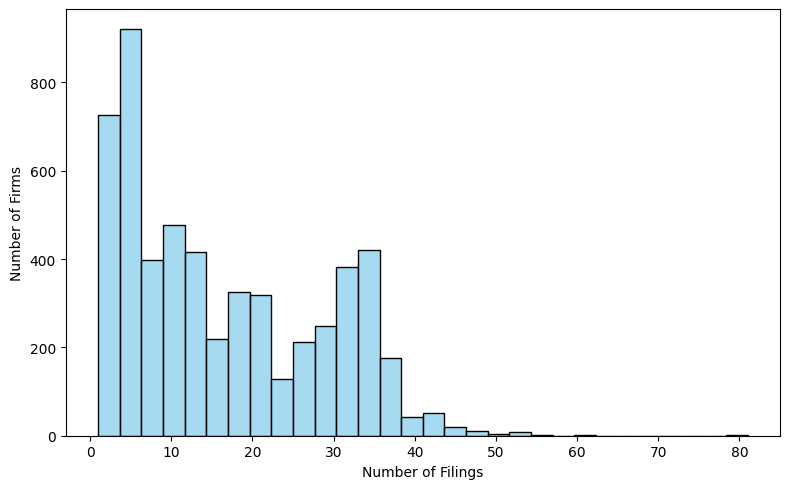

In [26]:
# average shelf life of company
cik_counts = df['cik'].value_counts()

print("Summary statistics for firm presence (in firm-years):")
print(cik_counts.describe())
print(f"Median years of presence: {cik_counts.median()}")

plt.figure(figsize=(8, 5))
sns.histplot(cik_counts, bins=30, kde=False, color='skyblue')
plt.xlabel("Number of Filings")
plt.ylabel("Number of Firms")
# plt.title("Distribution of Filings")
plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/firm_years_distribution.pdf", bbox_inches='tight')
plt.show()

## Geography

In [27]:
print(f'number of different cities: {df.city.nunique()}')
print(f'number of different states: {df.state.nunique()}')
print(f'number of different states of incorporation: {df.incorp_state.nunique()}')

number of different cities: 2157
number of different states: 128
number of different states of incorporation: 91


In [28]:
# Unique values
unique_states = df['state'].dropna().unique()
unique_incorp_states = df['incorp_state'].dropna().unique()

# Filter to only those with letters only (2-letter codes like 'NY', 'CA', etc.)
states_alpha = [s for s in unique_states if re.fullmatch(r'[A-Z]{2}', str(s))]
incorp_states_alpha = [s for s in unique_incorp_states if re.fullmatch(r'[A-Z]{2}', str(s))]

# Print counts
print(f"Total unique states: {len(unique_states)}")
print(f"States with only letters (USA): {len(states_alpha)}")
#includes territories PR (Puerto Rico), GU (Guam), VI (Virgin Islands), and the capital DC (District of Columbia)

print(f"Total unique states of incorporation: {len(unique_incorp_states)}")
print(f"Incorp states with only letters: {len(incorp_states_alpha)}")

Total unique states: 128
States with only letters (USA): 54
Total unique states of incorporation: 91
Incorp states with only letters: 54


In [29]:
print(f"number of states incorp state mismatches: {(df['state'] != df['incorp_state']).sum()}")

number of states incorp state mismatches: 61881


### Cities

city
NEW YORK     5215
HOUSTON      2510
DALLAS       1619
CHICAGO      1296
SAN DIEGO    1195
Name: count, dtype: int64


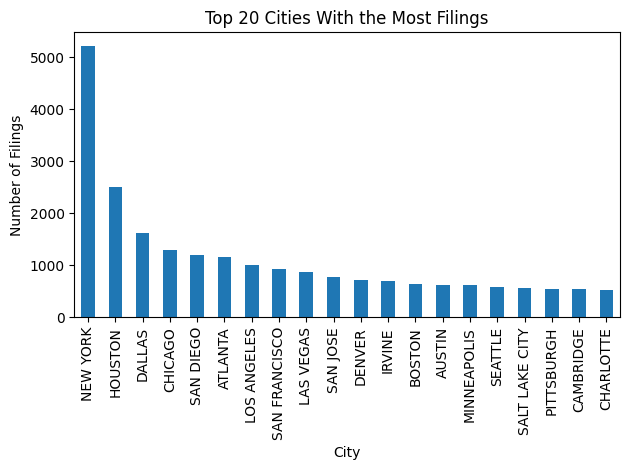

In [295]:
print(df['city'].value_counts()[:5])
df['city'].value_counts()[:20].plot(kind='bar')

plt.title("Top 20 Cities With the Most Filings")
plt.xlabel("City")
plt.ylabel("Number of Filings")
plt.tight_layout()
# plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/top20cities.pdf", bbox_inches='tight')
plt.show()

city
NEW YORK     580
HOUSTON      190
DALLAS       134
SAN DIEGO    125
LAS VEGAS    120
Name: cik, dtype: int64


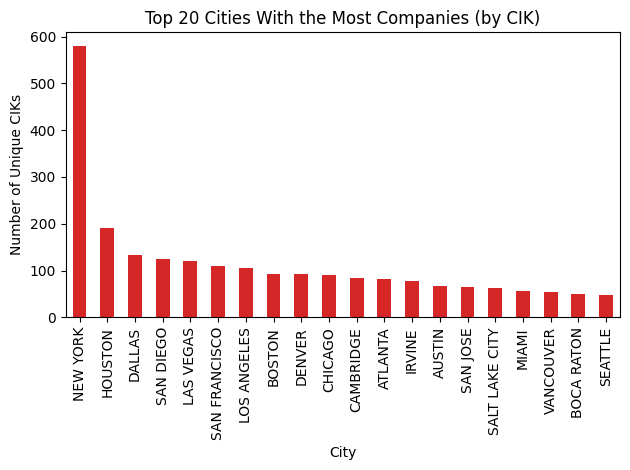

In [34]:
# Print top 5 cities by unique companies
print(df.groupby('city')['cik'].nunique().sort_values(ascending=False).head(5))


# Plot top 20 cities
df.groupby('city')['cik'].nunique().sort_values(ascending=False).head(20).plot(kind='bar', color='tab:red')

plt.title("Top 20 Cities With the Most Companies (by CIK)")
plt.xlabel("City")
plt.ylabel("Number of Unique CIKs")
plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/top20cities_unique_ciks.pdf", bbox_inches='tight')
plt.show()

### States

state
CA    13829
NY     9233
TX     7602
FL     4239
MA     4057
Name: count, dtype: int64


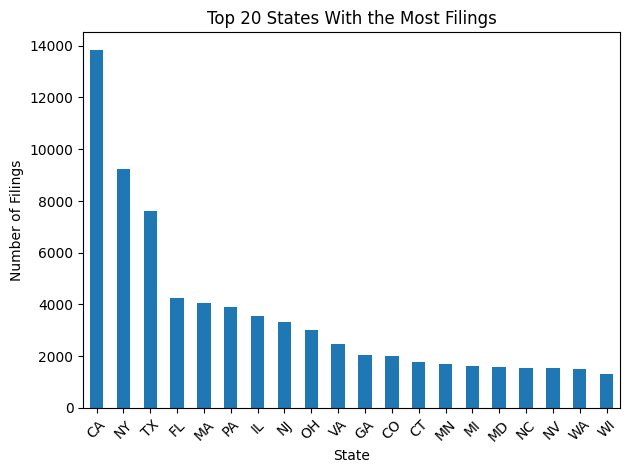

In [296]:
print(df['state'].value_counts()[:5])
df['state'].value_counts()[:20].plot(kind='bar')

plt.title("Top 20 States With the Most Filings")
plt.xlabel("State")
plt.ylabel("Number of Filings")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/top20states.pdf", bbox_inches='tight')
plt.show()

state
CA    1194
NY     800
TX     575
FL     443
MA     350
Name: cik, dtype: int64


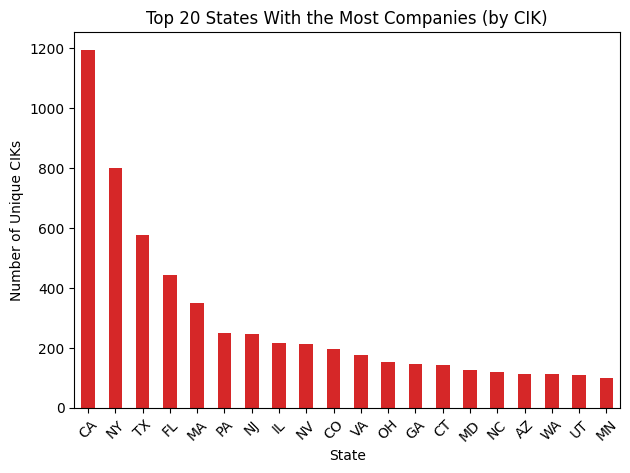

In [297]:
# Print top 5 states by unique companies
print(df.groupby('state')['cik'].nunique().sort_values(ascending=False).head(5))

# Plot top 20 states
df.groupby('state')['cik'].nunique().sort_values(ascending=False).head(20).plot(kind='bar', color='tab:red')

plt.title("Top 20 States With the Most Companies (by CIK)")
plt.xlabel("State")
plt.ylabel("Number of Unique CIKs")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/top20states_unique_ciks.pdf", bbox_inches='tight')
plt.show()

### Incorp States

incorp_state
DE    46272
NV     7781
MD     4210
NY     2428
PA     2166
Name: count, dtype: int64


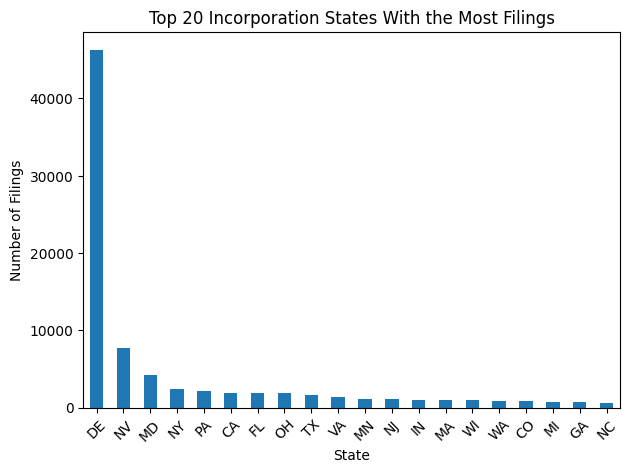

In [298]:
print(df['incorp_state'].value_counts()[:5])
df['incorp_state'].value_counts()[:20].plot(kind='bar')

plt.title("Top 20 Incorporation States With the Most Filings")
plt.xlabel("State")
plt.ylabel("Number of Filings")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/top20incorp.pdf", bbox_inches='tight')
plt.show()

incorp_state
DE    3204
NV     679
MD     259
E9     193
CA     143
Name: cik, dtype: int64


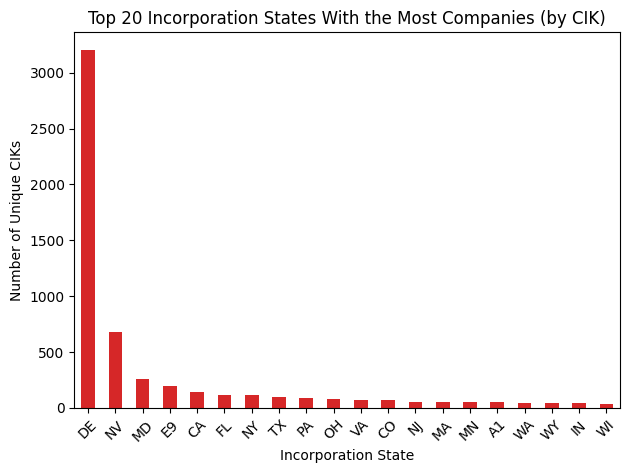

In [299]:
# Print top 5 incorporation states by unique companies
print(df.groupby('incorp_state')['cik'].nunique().sort_values(ascending=False).head(5))

# Plot top 20 incorporation states
df.groupby('incorp_state')['cik'].nunique().sort_values(ascending=False).head(20).plot(kind='bar', color='tab:red')

plt.title("Top 20 Incorporation States With the Most Companies (by CIK)")
plt.xlabel("Incorporation State")
plt.ylabel("Number of Unique CIKs")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/top20incorp_unique_ciks.pdf", bbox_inches='tight')
plt.show()

## Industry

### SIC codes with most filings and companies

number of different sic codes: 411
sic
2834.0    5265
6022.0    3938
6798.0    3887
7372.0    2408
6021.0    2370
2836.0    1756
3841.0    1685
7389.0    1651
1311.0    1588
3674.0    1544
6331.0    1130
6770.0    1117
7373.0     847
4911.0     835
7374.0     824
6035.0     818
3714.0     768
5812.0     747
3845.0     730
1000.0     722
Name: count, dtype: int64
Max: 5265
Min: 2
Mean: 214.23
Std: 457.34
Median: 100.0


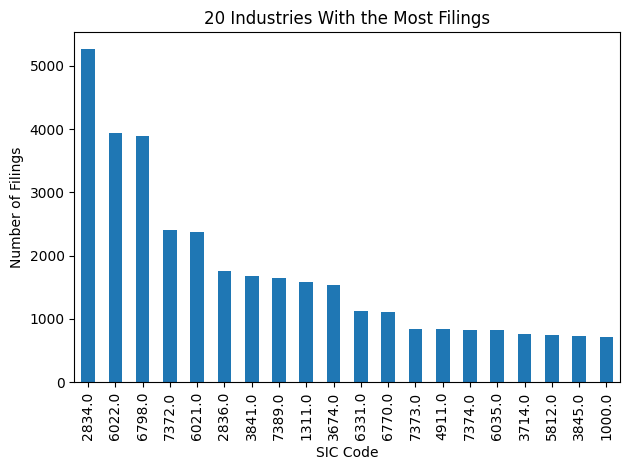

In [ ]:
print(f"number of different sic codes: {df['sic'].nunique()}")
print(df['sic'].value_counts().head(20))

print(f"Max: {df['sic'].value_counts().max()}")
print(f"Min: {df['sic'].value_counts().min()}")
print(f"Mean: {df['sic'].value_counts().mean():.2f}")
print(f"Std: {df['sic'].value_counts().std():.2f}")
print(f"Median: {df['sic'].value_counts().median()}")
df['sic'].value_counts().head(20).plot(kind='bar')

plt.title("20 Industries With the Most Filings")
plt.xlabel("SIC Code")
plt.ylabel("Number of Filings")
plt.tight_layout()
# plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/top20sic.pdf", bbox_inches='tight')
plt.show()

sic
2834.0    540
6770.0    435
7372.0    251
6798.0    217
6022.0    198
7389.0    177
2836.0    176
3841.0    143
1311.0    114
6021.0    106
7374.0    104
3674.0     90
6199.0     90
4911.0     74
7370.0     72
1000.0     67
6221.0     67
7373.0     65
8742.0     63
6035.0     60
Name: cik, dtype: int64
Max: 540
Min: 1
Mean: 17.09
Std: 42.99
Median: 7.0


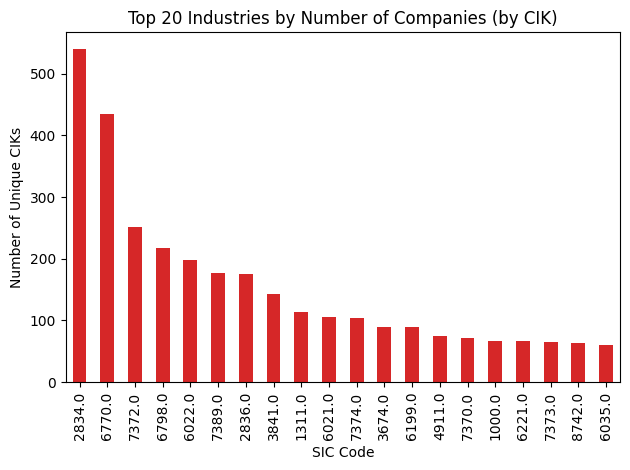

In [81]:
# Print summary stats
print(df.groupby('sic')['cik'].nunique().sort_values(ascending=False).head(20))
print(f"Max: {df.groupby('sic')['cik'].nunique().sort_values(ascending=False).max()}")
print(f"Min: {df.groupby('sic')['cik'].nunique().sort_values(ascending=False).min()}")
print(f"Mean: {df.groupby('sic')['cik'].nunique().sort_values(ascending=False).mean():.2f}")
print(f"Std: {df.groupby('sic')['cik'].nunique().sort_values(ascending=False).std():.2f}")
print(f"Median: {df.groupby('sic')['cik'].nunique().sort_values(ascending=False).median()}")

# Plot
df.groupby('sic')['cik'].nunique().sort_values(ascending=False).head(20).plot(kind='bar', color='tab:red')

plt.title("Top 20 Industries by Number of Companies (by CIK)")
plt.xlabel("SIC Code")
plt.ylabel("Number of Unique CIKs")
plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/top20sic_unique_ciks.pdf", bbox_inches='tight')
plt.show()

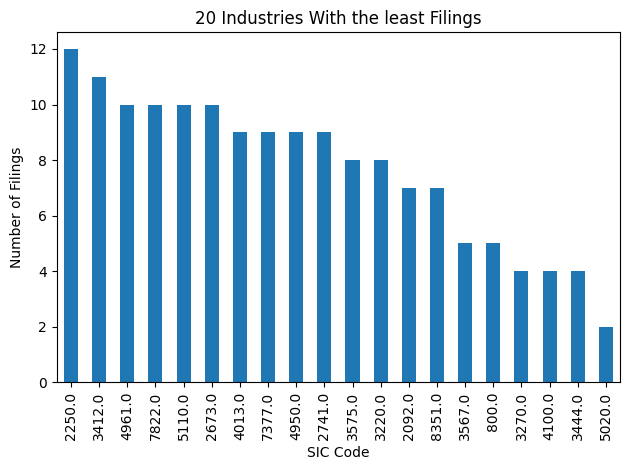

In [82]:
df['sic'].value_counts().tail(20).plot(kind='bar')

plt.title("20 Industries With the least Filings")
plt.xlabel("SIC Code")
plt.ylabel("Number of Filings")
plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/bot20sic.pdf", bbox_inches='tight')
plt.show()

In [83]:
# Abnormal SIC codes
# df[df['sic'] == 0]
# ENRON OIL & GAS CO is sic 1311
# BP PRUDHOE BAY ROYALTY TRUST is sic 2911
# NATIONAL HEALTH LABORATORIES HOLDINGS INC is sic 8071
# df.loc[df['sic'] == "1044", 'sic'] = "1040"
# df.loc[36239, 'sic'] = 1311  # ENRON OIL & GAS CO
# df.loc[36243, 'sic'] = 1311  # ENRON OIL & GAS CO
# df.loc[38001, 'sic'] = 2911  # BP PRUDHOE BAY ROYALTY TRUST
# df.loc[46302, 'sic'] = 8071  # NATIONAL HEALTH LABORATORIES HOLDINGS INC
# df.loc[df['cik'] == 920148, 'sic']


In [63]:
# number of missing sic codes
print(f"Number of missing SIC codes: {df['sic'].isna().sum()}")
df[df['sic'].isna()].head(20)

Number of missing SIC codes: 1405


,cik,name,city,state,sic,incorp_state,filing_type,fye,filing_date,reporting_date,...,100b,105c7B,corruption,amis,fsf,fraudulent,char_count,word_count,word_density,year
52,914712,CMG INFORMATION SERVICES INC,ANDOVER,MA,NaN,DE,10-K,1900-07-31,1998-10-29,1998-07-31,...,0.0,0.0,0.0,1.0,1.0,0,265,45,5.888889,1998
58,914712,CMGI INC,ANDOVER,MA,NaN,DE,10-K,1900-07-31,2000-10-30,2000-07-31,...,0.0,0.0,0.0,1.0,1.0,0,378,60,6.300000,2000
207,910406,HAIN FOOD GROUP INC,UNIONDALE,NY,NaN,DE,10-K,1900-06-30,1998-09-28,1998-06-30,...,0.0,0.0,0.0,1.0,1.0,1,12920,2196,5.883424,1998
209,910406,HAIN CELESTIAL GROUP INC,UNIONDALE,NY,NaN,DE,10-K,1900-06-30,2000-09-28,2000-06-30,...,0.0,0.0,0.0,1.0,1.0,1,24722,4157,5.947077,2000
239,849547,BLACK BOX CORP,LAWRENCE,PA,NaN,DE,10-K405,1900-03-31,1997-06-27,1997-03-31,...,0.0,0.0,0.0,1.0,1.0,0,11262,1948,5.781314,1997
242,849547,BLACK BOX CORP,LAWRENCE,PA,NaN,DE,10-K405,1900-03-31,2000-06-29,2000-03-31,...,0.0,0.0,0.0,1.0,1.0,1,19434,3314,5.864212,2000
264,859475,TRIDENT MICROSYSTEMS INC,SANTA CLARA,CA,NaN,DE,10-K,1900-06-30,2000-09-28,2000-06-30,...,0.0,0.0,0.0,1.0,1.0,1,31089,5067,6.135583,2000
302,1015610,GOLD BANC CORP INC,LEAWOOD,KS,NaN,KS,10-K,1900-12-31,1999-03-31,1998-12-31,...,0.0,0.0,0.0,1.0,1.0,1,133,19,7.000000,1998
307,796486,ADELPHIA COMMUNICATIONS CORP,COUDERSPORT,PA,NaN,DE,10-K/A,1900-03-31,1994-07-29,1994-03-31,...,0.0,0.0,0.0,1.0,1.0,0,0,0,0.000000,1994
308,796486,ADELPHIA COMMUNICATIONS CORP,COUDERSPORT,PA,NaN,DE,10-K,1900-03-31,1995-06-29,1995-03-31,...,0.0,0.0,0.0,1.0,1.0,0,54621,8834,6.183043,1995


In [ ]:
# most underrepresented industry
df[df['sic'] == "5020"]

,cik,name,city,state,sic,incorp_state,filing_type,fye,filing_date,reporting_date,...,corruption,amis,fsf,fraudulent,char_count,word_count,word_density,sic_division,year,sic2
74477,1487198,"Hidden Ladder, Inc.",ROCKLIN,CA,5020,FL,10-K,1900-02-28,2011-04-12,2011-02-28,...,NaN,NaN,NaN,0,20263,3098,6.540671,Division F,2011,50
81555,1635282,GP Investments Acquisition Corp.,GRAND CAYMAN,E9,5020,E9,10-K,1900-12-31,2017-03-16,2016-12-31,...,NaN,NaN,NaN,0,13175,1980,6.654040,Division F,2016,50


### 2 digit SIC codes (Major Groups) with the most filings and companies

Number of unique 2-digit SICs: 68
sic
28    9886
73    8516
60    7613
67    5792
38    5412
36    5365
35    3789
49    2677
13    2292
37    2193
63    2172
20    1989
62    1810
48    1709
87    1625
10    1574
80    1332
50    1328
61    1214
59    1193
Name: count, dtype: int64
Max count: 9886
Min count: 4
Mean: 1294.82
Std: 2024.70
Median: 501.0


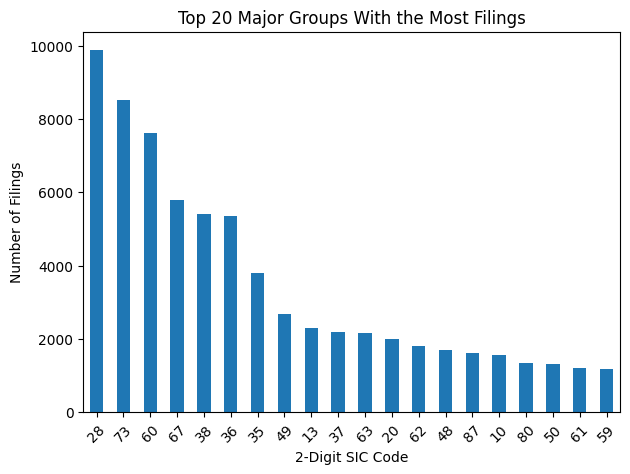

In [302]:
# Print summary statistics
print(f"Number of unique 2-digit SICs: {len(df['sic'].dropna().astype(str).str[:2].value_counts())}")
print(df['sic'].dropna().astype(str).str[:2].value_counts()[:20])
print(f"Max count: {df['sic'].dropna().astype(str).str[:2].value_counts().max()}")
print(f"Min count: {df['sic'].dropna().astype(str).str[:2].value_counts().min()}")
print(f"Mean: {df['sic'].dropna().astype(str).str[:2].value_counts().mean():.2f}")
print(f"Std: {df['sic'].dropna().astype(str).str[:2].value_counts().std():.2f}")
print(f"Median: {df['sic'].dropna().astype(str).str[:2].value_counts().median()}")

# Plot
df['sic'].dropna().astype(str).str[:2].value_counts()[:20].plot(kind='bar')
plt.title("Top 20 Major Groups With the Most Filings")
plt.xlabel("2-Digit SIC Code")
plt.ylabel("Number of Filings")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/top20sic2.pdf", bbox_inches='tight')
plt.show()

Number of unique 2-digit SICs: 68
sic2
28    912
73    826
67    705
38    369
60    367
36    326
35    215
49    198
13    165
87    153
61    150
62    149
37    143
10    142
20    129
80    120
48    114
63    112
59    105
65    102
Name: cik, dtype: int64
Max: 912
Min: 2
Mean: 99.62
Std: 175.68
Median: 31.5


/var/folders/zn/yk0_6g0j1yq_84_qjqk0dcnw0000gn/T/ipykernel_1022/172737903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sic2'] = df_clean['sic'].astype(str).str[:2]


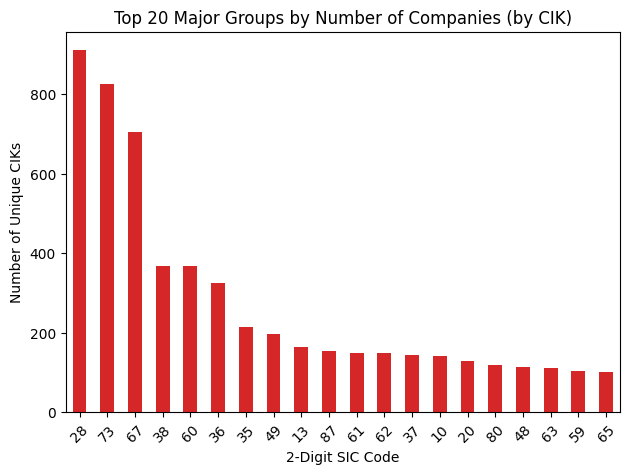

In [303]:
# Drop missing SICs and convert to string to extract first 2 digits
df_clean = df.dropna(subset=['sic'])
df_clean['sic2'] = df_clean['sic'].astype(str).str[:2]

# Count number of unique companies (CIKs) in each 2-digit SIC group
sic2_unique_ciks = df_clean.groupby('sic2')['cik'].nunique().sort_values(ascending=False)

# Print summary statistics
print(f"Number of unique 2-digit SICs: {len(sic2_unique_ciks)}")
print(sic2_unique_ciks[:20])
print(f"Max: {sic2_unique_ciks.max()}")
print(f"Min: {sic2_unique_ciks.min()}")
print(f"Mean: {sic2_unique_ciks.mean():.2f}")
print(f"Std: {sic2_unique_ciks.std():.2f}")
print(f"Median: {sic2_unique_ciks.median()}")

# Plot top 20
sic2_unique_ciks[:20].plot(kind='bar', color='tab:red')

plt.title("Top 20 Major Groups by Number of Companies (by CIK)")
plt.xlabel("2-Digit SIC Code")
plt.ylabel("Number of Unique CIKs")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/top20sic2_unique_ciks.pdf", bbox_inches='tight')
plt.show()

### Major DIvisions with the most filings and companies

In [90]:
def map_sic_to_division(sic_code):
    try:
        sic = int(str(sic_code)[:2])
    except:
        return "Unknown"

    if 1 <= sic <= 9:
        return "Division A"
    elif 10 <= sic <= 14:
        return "Division B"
    elif 15 <= sic <= 17:
        return "Division C"
    elif 20 <= sic <= 39:
        return "Division D"
    elif 40 <= sic <= 49:
        return "Division E"
    elif 50 <= sic <= 51:
        return "Division F"
    elif 52 <= sic <= 59:
        return "Division G"
    elif 60 <= sic <= 67:
        return "Division H"
    elif 70 <= sic <= 89:
        return "Division I"
    elif 91 <= sic <= 97:
        return "Division J"
    elif sic == 99:
        return "Division K"
    else:
        return "Unknown"

In [93]:
df['sic_division'] = df['sic'].apply(map_sic_to_division)

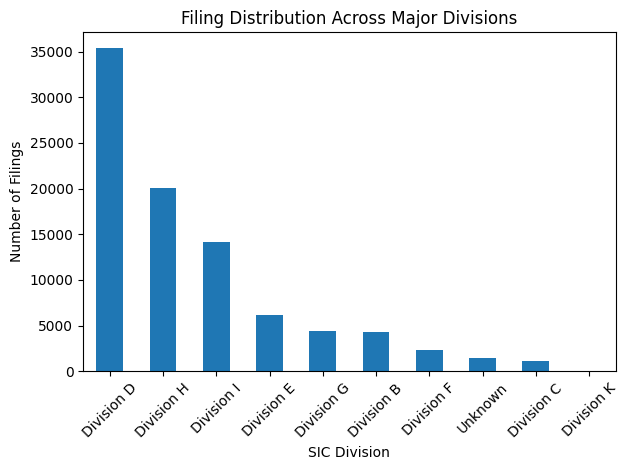

In [ ]:
df['sic'].apply(map_sic_to_division).value_counts().sort_values(ascending=False).plot(kind='bar')

plt.title("Filing Distribution Across Major Divisions")
plt.xlabel("SIC Division")
plt.ylabel("Number of Filings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/sic_division_distribution.pdf", bbox_inches='tight')
plt.show()

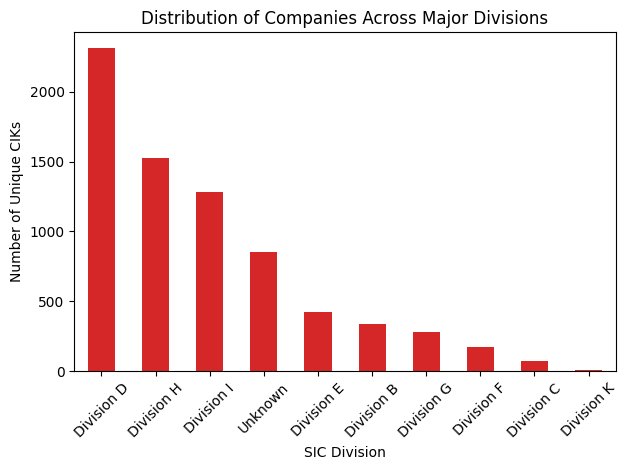

In [95]:
# Plot
df.groupby('sic_division')['cik'].nunique().sort_values(ascending=False).plot(kind='bar', color='tab:red')

plt.title("Distribution of Companies Across Major Divisions")
plt.xlabel("SIC Division")
plt.ylabel("Number of Unique CIKs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/sic_division_unique_ciks.pdf", bbox_inches='tight')
plt.show()

## filings

filing_type
10-K         73411
10-K/A       11916
10-K405       3370
10-K405/A      546
10-KT          176
10-KT/A         34
Name: count, dtype: int64


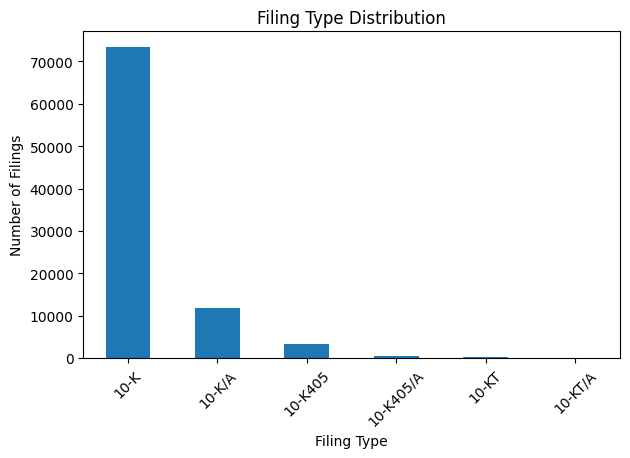

In [304]:
print(df['filing_type'].value_counts())

df['filing_type'].value_counts().plot(kind='bar')

plt.title("Filing Type Distribution")
plt.xlabel("Filing Type")
plt.ylabel("Number of Filings")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/filingtypedist.pdf", bbox_inches='tight')
plt.show()

## MDAs

In [ ]:
# Word count distribution
df['word_count'].describe()

count     89453.000000
mean       8017.062457
std        7592.091166
min           0.000000
25%        2277.000000
50%        6879.000000
75%       11637.000000
max      191537.000000
Name: word_count, dtype: float64

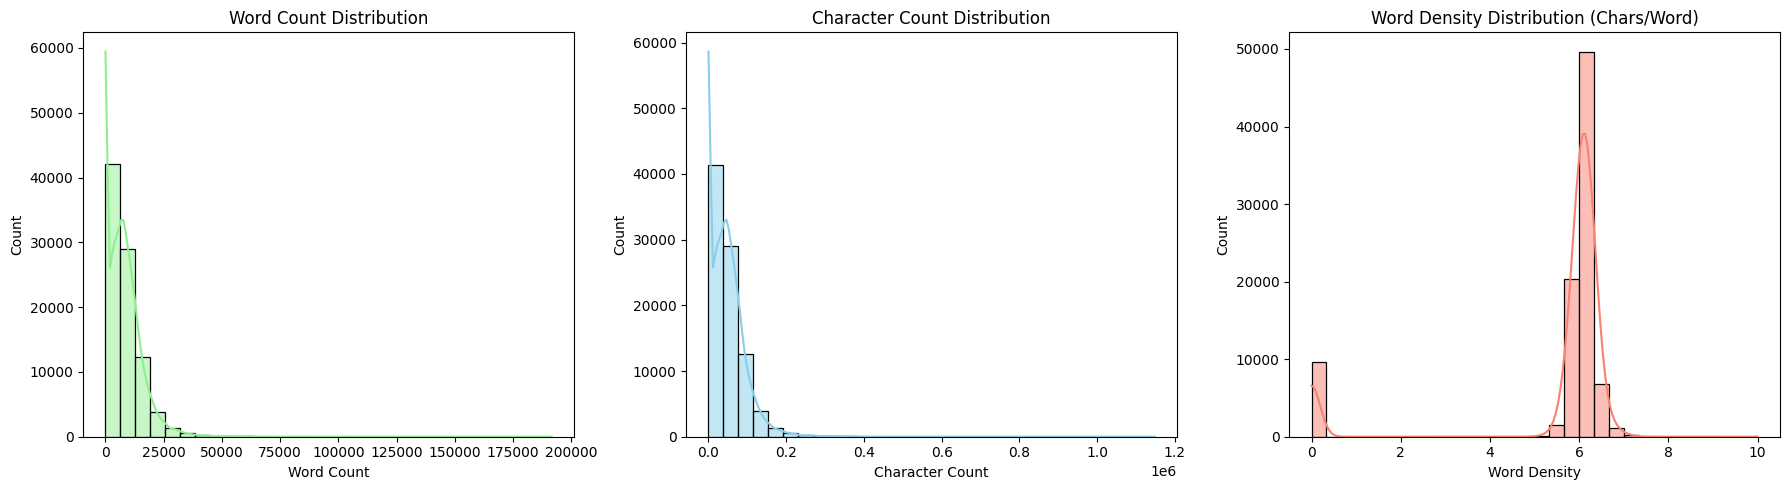

In [99]:
plt.figure(figsize=(18, 5))

# Word count
plt.subplot(1, 3, 1)
sns.histplot(df['word_count'], kde=True, bins=30, color="lightgreen")
plt.title("Word Count Distribution")
plt.xlabel("Word Count")

# Char count
plt.subplot(1, 3, 2)
sns.histplot(df['char_count'], kde=True, bins=30, color="skyblue")
plt.title("Character Count Distribution")
plt.xlabel("Character Count")

# Word density
plt.subplot(1, 3, 3)
sns.histplot(df['word_density'], kde=True, bins=30, color="salmon")
plt.title("Word Density Distribution (Chars/Word)")
plt.xlabel("Word Density")

plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/text_dist.pdf", bbox_inches='tight')
plt.show()

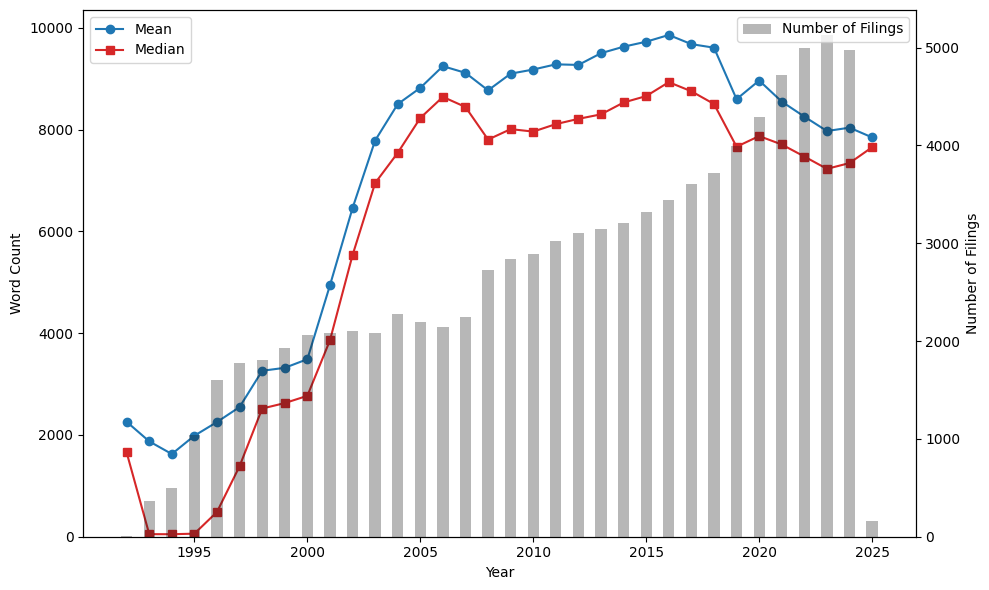

In [ ]:
# yearly distribution of filings and word counts
# Prepare data
agg_df = df.groupby('year').agg(
    fraudulent_count=('fraudulent', 'sum'),
    total_count=('fraudulent', 'count'),
    mean_word_count=('word_count', 'mean'),
    median_word_count=('word_count', 'median')
)

# Plot mean and median on primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(agg_df.index, agg_df['mean_word_count'], marker='o', label='Mean', color='tab:blue')
ax1.plot(agg_df.index, agg_df['median_word_count'], marker='s', label='Median', color='tab:red')
ax1.set_ylabel('Word Count')
ax1.set_xlabel('Year')
ax1.set_ylim(bottom=0)
# ax1.grid(True)
ax1.legend(loc='upper left')

# Add bar chart of total_count on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(agg_df.index, agg_df['total_count'], color='#111111', alpha=0.3, width=0.5, label='Number of Filings')
ax2.set_ylabel('Number of Filings')
ax2.legend(loc='upper right')

# plt.title('Average and Median Word Count per Year with Filing Count')
plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/word_year_dist.pdf", bbox_inches='tight')
plt.show()

count     68894.000000
mean       9986.599486
std        7277.279742
min         201.000000
25%        5133.250000
50%        8606.500000
75%       12958.000000
max      191537.000000
Name: word_count, dtype: float64
count    6.889400e+04
mean     6.066660e+04
std      4.426747e+04
min      1.218000e+03
25%      3.126050e+04
50%      5.252000e+04
75%      7.865025e+04
max      1.147985e+06
Name: char_count, dtype: float64
count    68894.000000
mean         6.081804
std          0.181123
min          4.342709
25%          5.975763
50%          6.097039
75%          6.203073
max          7.306604
Name: word_density, dtype: float64


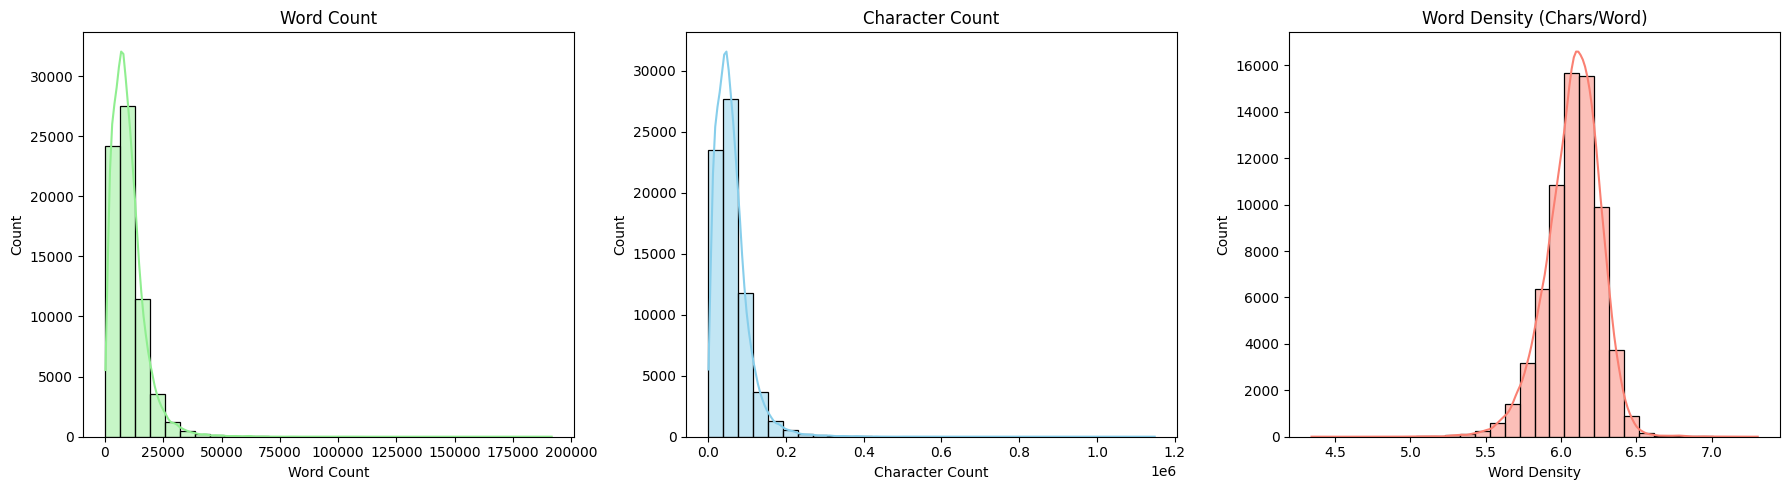

In [ ]:
# text metrics on filtered dataset
# text metrics
print(df_text['word_count'].describe())
print(df_text['char_count'].describe())
print(df_text['word_density'].describe())


plt.figure(figsize=(18, 5))

# Word count
plt.subplot(1, 3, 1)
sns.histplot(df_text['word_count'], kde=True, bins=30, color="lightgreen")
plt.title("Word Count")
plt.xlabel("Word Count")

# Char count
plt.subplot(1, 3, 2)
sns.histplot(df_text['char_count'], kde=True, bins=30, color="skyblue")
plt.title("Character Count")
plt.xlabel("Character Count")

# Word density
plt.subplot(1, 3, 3)
sns.histplot(df_text['word_density'], kde=True, bins=30, color="salmon")
plt.title("Word Density (Chars/Word)")
plt.xlabel("Word Density")

plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/legit_text_distributions.pdf", bbox_inches='tight')
plt.show()

count      1596.000000
mean      11892.440476
std        9849.160086
min         201.000000
25%        6173.750000
50%       10249.000000
75%       15379.500000
max      191537.000000
Name: word_count, dtype: float64
count    1.596000e+03
mean     7.257069e+04
std      5.991086e+04
min      1.218000e+03
25%      3.751750e+04
50%      6.284700e+04
75%      9.430250e+04
max      1.147985e+06
Name: char_count, dtype: float64
count    1596.000000
mean        6.093415
std         0.165526
min         5.015548
25%         5.995427
50%         6.103686
75%         6.204405
max         6.670588
Name: word_density, dtype: float64


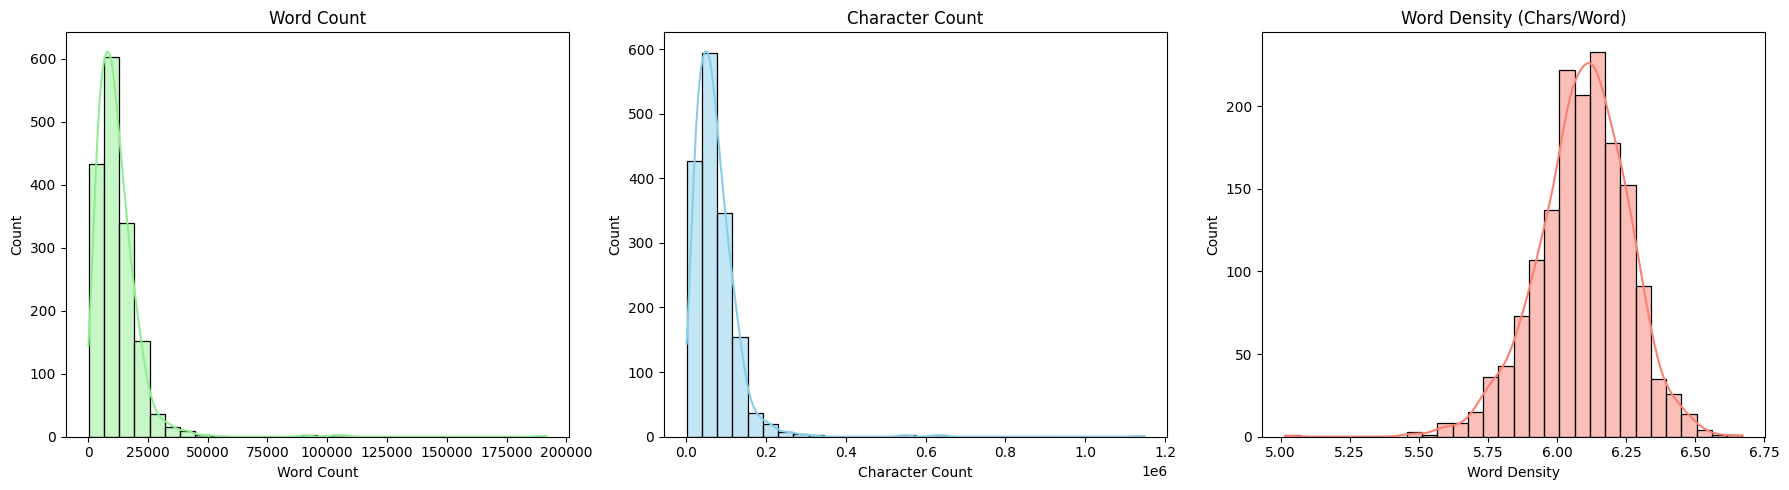

In [132]:
# text metrics on fraudulent cases
print(df_text[df_text['fraudulent'] == 1]['word_count'].describe())
print(df_text[df_text['fraudulent'] == 1]['char_count'].describe())
print(df_text[df_text['fraudulent'] == 1]['word_density'].describe())


plt.figure(figsize=(18, 5))

# Word count
plt.subplot(1, 3, 1)
sns.histplot(df_text[df_text['fraudulent'] == 1]['word_count'], kde=True, bins=30, color="lightgreen")
plt.title("Word Count")
plt.xlabel("Word Count")

# Char count
plt.subplot(1, 3, 2)
sns.histplot(df_text[df_text['fraudulent'] == 1]['char_count'], kde=True, bins=30, color="skyblue")
plt.title("Character Count")
plt.xlabel("Character Count")

# Word density
plt.subplot(1, 3, 3)
sns.histplot(df_text[df_text['fraudulent'] == 1]['word_density'], kde=True, bins=30, color="salmon")
plt.title("Word Density (Chars/Word)")
plt.xlabel("Word Density")

plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_text_distributions.pdf", bbox_inches='tight')
plt.show()

## Fraud

In [174]:
# --- 1. Full dataset
counts_full = (
    df
    .groupby(['year', 'fraudulent'])
    .size()
    .unstack(fill_value=0)
)
counts_full['fraud_ratio'] = counts_full[1] / (counts_full[0] + counts_full[1])

# --- 2. Filtered dataset
counts_text = (
    df_text
    .groupby(['year', 'fraudulent'])
    .size()
    .unstack(fill_value=0)
)
counts_text['fraud_ratio'] = counts_text[1] / (counts_text[0] + counts_text[1])

/var/folders/zn/yk0_6g0j1yq_84_qjqk0dcnw0000gn/T/ipykernel_1022/1366253966.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(abs(int(t))) if t != 0 else '0' for t in xticks])
/var/folders/zn/yk0_6g0j1yq_84_qjqk0dcnw0000gn/T/ipykernel_1022/1366253966.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([f"{abs(t):.2f}" if t != 0 else '0.00' for t in xticks2])


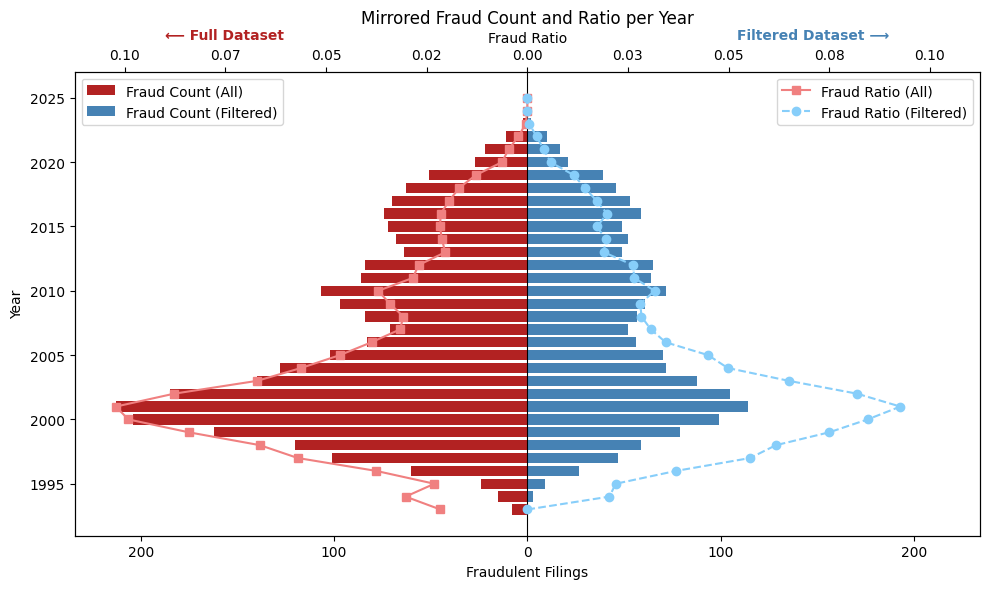

In [180]:
# Intersect years to align both datasets
common_years = counts_full.index.intersection(counts_text.index)

# Extract aligned series
fraud_all = counts_full.loc[common_years, 1]
fraud_filtered = counts_text.loc[common_years, 1]
ratio_all = counts_full.loc[common_years, 'fraud_ratio']
ratio_filtered = counts_text.loc[common_years, 'fraud_ratio']

# Create figure and primary axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot full dataset bars mirrored left
ax.barh(common_years, fraud_all, left=-fraud_all, color='firebrick', label='Fraud Count (All)')
# Plot filtered dataset bars to right
ax.barh(common_years, fraud_filtered, color='steelblue', label='Fraud Count (Filtered)')

# Vertical center line
ax.axvline(0, color='black', linewidth=0.8)

# X-axis limits and relabeling as positive values
max_val = max(fraud_all.max(), fraud_filtered.max())
ax.set_xlim(-max_val * 1.1, max_val * 1.1)
xticks = ax.get_xticks()
ax.set_xticklabels([str(abs(int(t))) if t != 0 else '0' for t in xticks])

# Axis labels
ax.set_xlabel('Fraudulent Filings')
ax.set_ylabel('Year')

# Twin x-axis for mirrored fraud ratio
ax2 = ax.twiny()
ax2.plot(-ratio_all, common_years, color='lightcoral', marker='s', label='Fraud Ratio (All)')
ax2.plot(ratio_filtered, common_years, color='lightskyblue', marker='o', linestyle='--', label='Fraud Ratio (Filtered)')

# Set symmetric x-limits and relabel fraud ratio ticks as positive
max_ratio = max(ratio_all.max(), ratio_filtered.max())
ax2.set_xlim(-max_ratio * 1.1, max_ratio * 1.1)
xticks2 = ax2.get_xticks()
ax2.set_xticklabels([f"{abs(t):.2f}" if t != 0 else '0.00' for t in xticks2])
ax2.set_xlabel('Fraud Ratio')

# Fixed annotations: absolute axes fraction coordinates
ax2.annotate('⟵ Full Dataset', xy=(0.1, 1.07), xycoords='axes fraction',
             ha='left', fontsize=10, fontweight='bold', color='firebrick')
ax2.annotate('Filtered Dataset ⟶', xy=(0.9, 1.07), xycoords='axes fraction',
             ha='right', fontsize=10, fontweight='bold', color='steelblue')

# Title and legends
ax.set_title('Mirrored Fraud Count and Ratio per Year')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()

plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_year_ratio.pdf", bbox_inches='tight')

plt.show()

### Fraud Duration

In [ ]:
df_labels['fraud_start'] = pd.to_datetime(df_labels['fraud_start'], format='%m-%Y')
df_labels['fraud_end'] = (pd.to_datetime(df_labels['fraud_end'], format='%m-%Y') + MonthEnd(0))

In [ ]:
df_labels['fraud_duration'] = (df_labels['fraud_end'] - df_labels['fraud_start']).dt.days

print("Summary Statistics for Fraud Duration (in days):")
print(df_labels['fraud_duration'].describe())
print("Median Fraud Duration: {}".format(df_labels['fraud_duration'].median()))

Summary Statistics for Fraud Duration (in days):
count     570.000000
mean     1148.501754
std      1111.092446
min        30.000000
25%       365.000000
50%       836.500000
75%      1580.750000
max      9130.000000
Name: fraud_duration, dtype: float64
Median Fraud Duration: 836.5


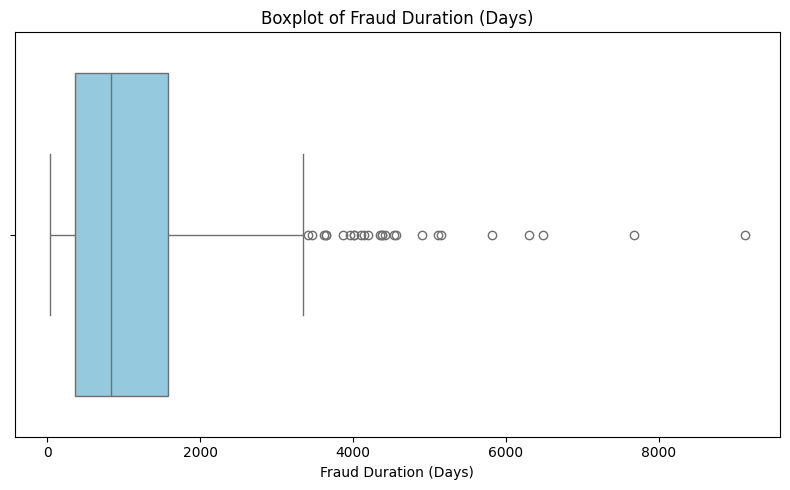

In [207]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_labels['fraud_duration'], color='skyblue')
plt.title("Boxplot of Fraud Duration (Days)")
plt.xlabel("Fraud Duration (Days)")
plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraudduration.pdf", bbox_inches='tight')
plt.show()

In [209]:
# max fraud
df_labels[df_labels['fraud_duration'] == df_labels['fraud_duration'].max()]

,id,dateTime,aaerNo,releaseNo,respondents,respondentsText,urls,fraud_start,fraud_end,cik,...,14c,19a,30A,100a2,100b,105c7B,corruption,amis,fsf,fraud_duration
104,bbf413e9f49883152459da0fd2ae00a0,2011-12-20T09:24:38-05:00,AAER-3348,LR-22203,Aon Corporation,Aon Corporation,https://www.sec.gov/enforcement-litigation/lit...,1983-01-01,2007-12-31,315293,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9130


### Detection Delay

In [210]:
df_labels['dateTime'] = df_labels['dateTime'].astype(str).str.split('T').str[0]
df_labels['dateTime'] = pd.to_datetime(df_labels['dateTime'], format='%Y-%m-%d', errors='coerce')

Summary Statistics for Fraud Detection Delay (in days):
count      570.000000
mean      2392.687719
std       1259.553186
min        347.000000
25%       1577.000000
50%       2134.500000
75%       2980.000000
max      10580.000000
Name: detection_delay, dtype: float64
Median Detection Delay: 2134.5


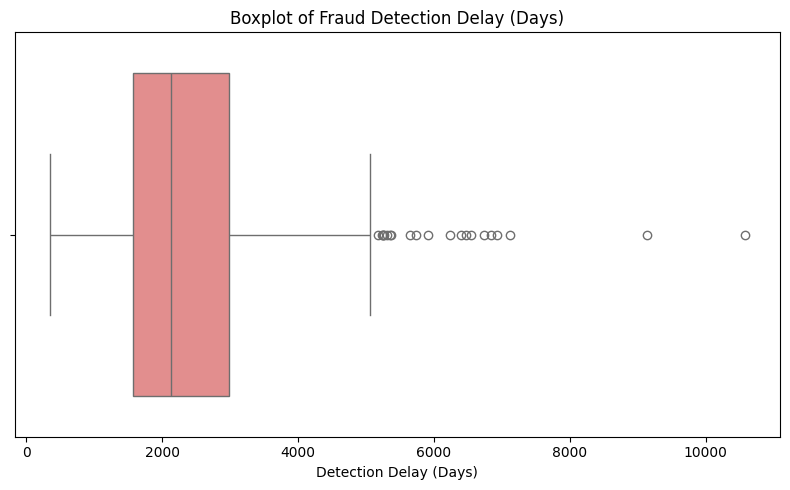

In [ ]:
df_labels['detection_delay'] = (df_labels['dateTime'] - df_labels['fraud_start']).dt.days

# Print summary
print("Summary Statistics for Fraud Detection Delay (in days):")
print(df_labels['detection_delay'].describe())
print("Median Detection Delay: {}".format(df_labels['detection_delay'].median()))

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_labels['detection_delay'], color='lightcoral')
plt.title("Boxplot of Fraud Detection Delay (Days)")
plt.xlabel("Detection Delay (Days)")
plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_detection_delay.pdf", bbox_inches='tight')
plt.show()

In [219]:
df_labels[df_labels['detection_delay'] == df_labels['detection_delay'].max()]

,id,dateTime,aaerNo,releaseNo,respondents,respondentsText,urls,fraud_start,fraud_end,cik,...,19a,30A,100a2,100b,105c7B,corruption,amis,fsf,fraud_duration,detection_delay
104,bbf413e9f49883152459da0fd2ae00a0,2011-12-20,AAER-3348,LR-22203,Aon Corporation,Aon Corporation,https://www.sec.gov/enforcement-litigation/lit...,1983-01-01,2007-12-31,315293,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9130,10580


### Post fraud detection Delay

Summary Statistics for Post-Fraud Detection Delay (in days):
count     568.000000
mean     1248.654930
std       598.145757
min        21.000000
25%       810.500000
50%      1186.500000
75%      1627.000000
max      3623.000000
Name: post_fraud_delay, dtype: float64
Median Post-Fraud Delay: 1186.5


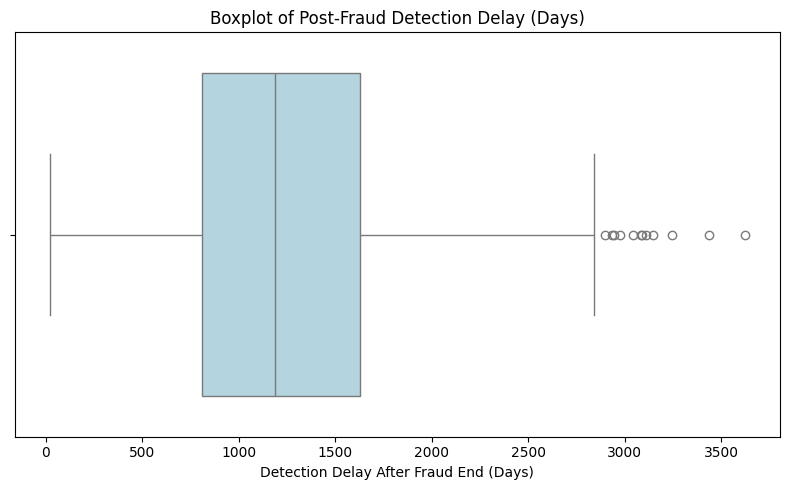

In [ ]:
df_labels['post_fraud_delay'] = (df_labels['dateTime'] - df_labels['fraud_end']).dt.days

# Step 6: Drop negative durations
df_labels = df_labels[df_labels['post_fraud_delay'] >= 0]
print("Summary Statistics for Post-Fraud Detection Delay (in days):")
print(df_labels['post_fraud_delay'].describe())
print("Median Post-Fraud Delay: {}".format(df_labels['post_fraud_delay'].median()))

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_labels['post_fraud_delay'], color='lightblue')
plt.title("Boxplot of Post-Fraud Detection Delay (Days)")
plt.xlabel("Detection Delay After Fraud End (Days)")
plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/post_fraud_detection_delay.pdf", bbox_inches='tight')
plt.show()

In [221]:
df_labels[df_labels['post_fraud_delay'] == df_labels['post_fraud_delay'].max()]

,id,dateTime,aaerNo,releaseNo,respondents,respondentsText,urls,fraud_start,fraud_end,cik,...,30A,100a2,100b,105c7B,corruption,amis,fsf,fraud_duration,detection_delay,post_fraud_delay
305,feb1d69b2ad8a583a3a7bf61d872f8c0,2010-09-01,AAER-3179,LR-21639,"Lucent Technologies, Inc., et al.","Lucent Technologies, Inc., et al.",https://www.sec.gov/enforcement-litigation/lit...,1999-10-01,2000-09-30,1006240,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,365,3988,3623


### fraud types

In [228]:
violations = [ '17a', '17a2', '17a3', '17b', '5a',
       '5b1', '5c', '10b', '13a', '12b20', '12b25', '13a1', '13a10', '13a11',
       '13a13', '13a14', '13a16', '13b2A', '13b2B', '13a15', '13b5', '14a',
       '14c', '19a', '30A', '100a2', '100b', '105c7B']

/var/folders/zn/yk0_6g0j1yq_84_qjqk0dcnw0000gn/T/ipykernel_1022/3926160259.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_violations_sorted.index, y=labels_violations_sorted.values, palette="viridis")


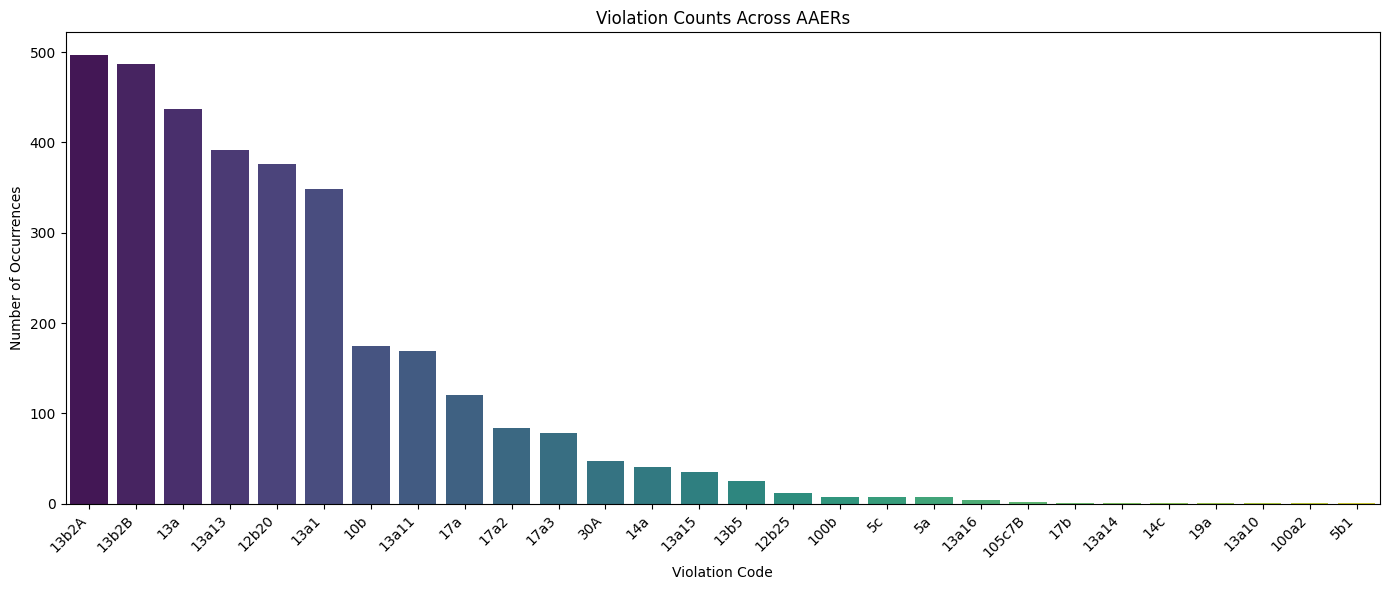

In [ ]:
# distribution of violations
labels_violations = df_labels[violations].sum()
labels_violations_sorted = labels_violations.sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=labels_violations_sorted.index, y=labels_violations_sorted.values, palette="viridis")

plt.title("Violation Counts Across AAERs")
plt.ylabel("Number of Occurrences")
plt.xlabel("Violation Code")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/violationcounts.pdf", bbox_inches='tight')
plt.show()

In [231]:
acfe_categories = ["corruption", "amis", "fsf"]

fsf           478.0
corruption     94.0
amis           29.0
dtype: float64


/var/folders/zn/yk0_6g0j1yq_84_qjqk0dcnw0000gn/T/ipykernel_1022/1680787150.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acfe_dist_sorted.index, y=acfe_dist_sorted.values, palette="viridis")


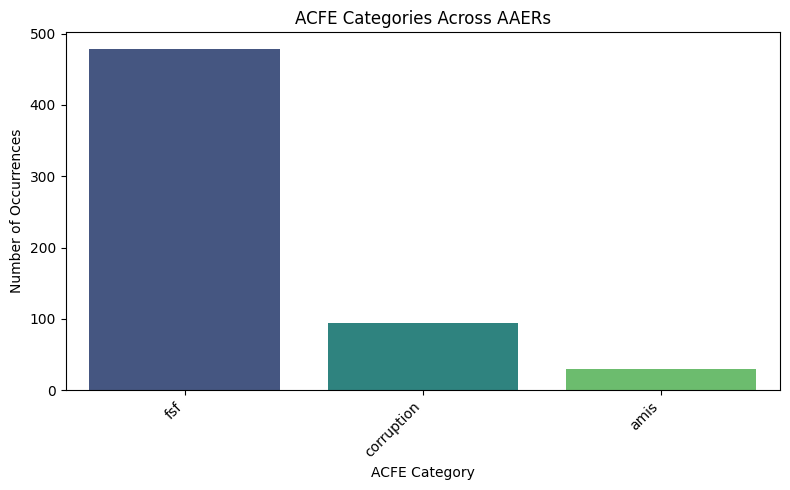

In [ ]:
# distribution of ACFE categories
acfe_dist = df_labels[acfe_categories].sum()
acfe_dist_sorted = acfe_dist.sort_values(ascending=False)

print(acfe_dist_sorted)

plt.figure(figsize=(8, 5))
sns.barplot(x=acfe_dist_sorted.index, y=acfe_dist_sorted.values, palette="viridis")

plt.title("ACFE Categories Across AAERs")
plt.ylabel("Number of Occurrences")
plt.xlabel("ACFE Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/acfecounts.pdf", bbox_inches='tight')
plt.show()

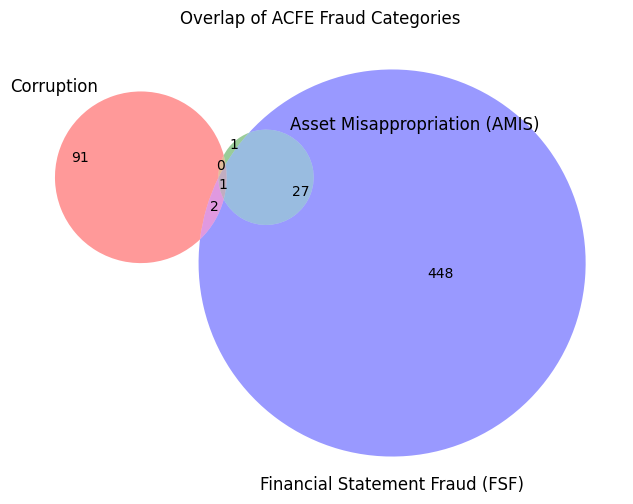

In [234]:
# Create sets based on boolean masks
set_corruption = set(df_labels[df_labels['corruption'] == 1].index)
set_amis       = set(df_labels[df_labels['amis'] == 1].index)
set_fsf        = set(df_labels[df_labels['fsf'] == 1].index)

# Plot Venn diagram
plt.figure(figsize=(8, 6))
venn3([set_corruption, set_amis, set_fsf], 
      set_labels=('Corruption', 'Asset Misappropriation (AMIS)', 'Financial Statement Fraud (FSF)'))
plt.title("Overlap of ACFE Fraud Categories")
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/acfevenn.pdf", bbox_inches='tight')
plt.show()

Certainty Start:
 certainty_start
0    204
1    366
Name: count, dtype: int64

Certainty End:
 certainty_end
0    134
1    436
Name: count, dtype: int64


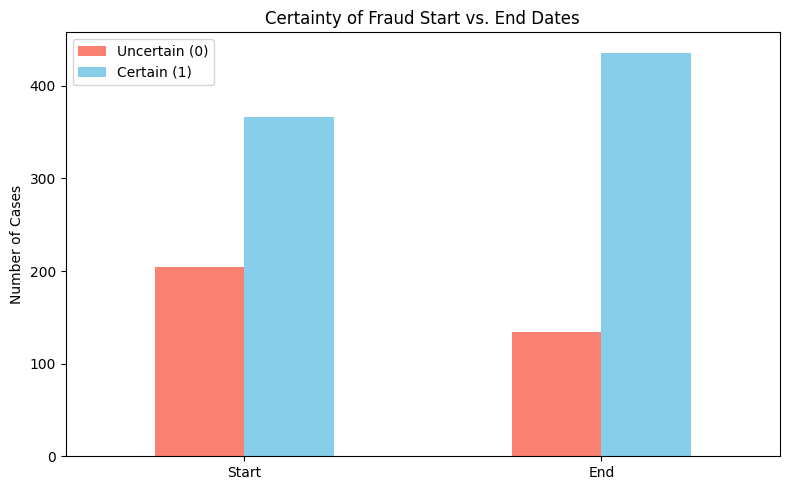

In [235]:
# certainties

start_counts = df_labels['certainty_start'].value_counts().sort_index()
end_counts = df_labels['certainty_end'].value_counts().sort_index()

print("Certainty Start:\n", start_counts)
print("\nCertainty End:\n", end_counts)

# Combine into a DataFrame
certainty_df = pd.DataFrame({
    "Start": start_counts,
    "End": end_counts
}).T  # Transpose for plotting

# Rename columns for clarity
certainty_df.columns = ['Uncertain (0)', 'Certain (1)']

# Plot
certainty_df.plot(kind='bar', figsize=(8, 5), color=['salmon', 'skyblue'])
plt.title("Certainty of Fraud Start vs. End Dates")
plt.ylabel("Number of Cases")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/certainty.pdf", bbox_inches='tight')
plt.show()

### fraud industry

### Fraud SIC

In [ ]:
agg = (
    df
    .groupby('sic')['fraudulent']
    .agg(
        fraud_count='sum',       # number of fraud==1
        total_count='count'      # total observations
    )
)

# 3) Compute fraud rate:
agg['fraud_rate'] = agg['fraud_count'] / agg['total_count']

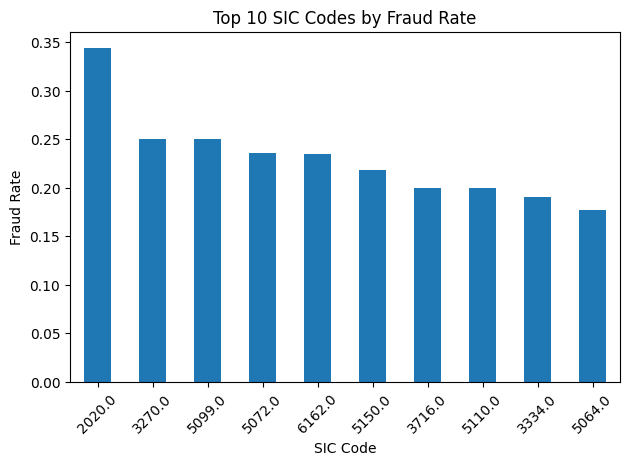

In [279]:
agg.sort_values('fraud_rate', ascending=False).head(10)['fraud_rate'].plot(kind='bar', color='tab:blue')

plt.title("Top 10 SIC Codes by Fraud Rate")
plt.xlabel("SIC Code")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_sic_rate.pdf", bbox_inches='tight')
plt.show()

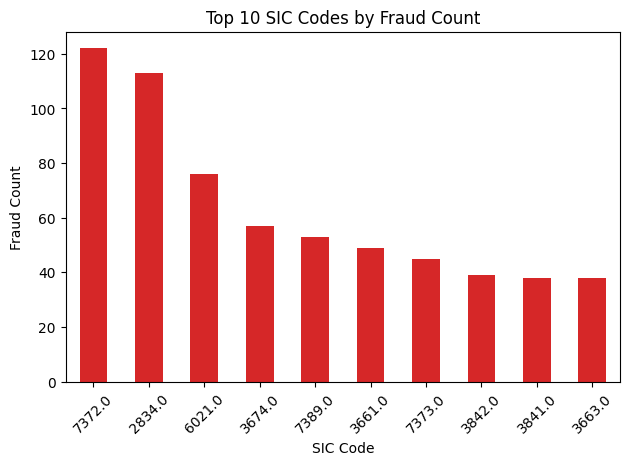

In [280]:
agg.sort_values('fraud_count', ascending=False).head(10)['fraud_count'].plot(kind='bar', color='tab:red')

plt.title("Top 10 SIC Codes by Fraud Count")
plt.xlabel("SIC Code")
plt.ylabel("Fraud Count")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_sic_count.pdf", bbox_inches='tight')
plt.show()

### Fraud SIC 2 Digit

In [255]:
df['sic2'] = df['sic'].astype(str).str[:2]

# 2) Group by the 2-digit SIC and compute fraud counts + totals
agg2 = (
    df
    .groupby('sic2')['fraudulent']
    .agg(
        fraud_count='sum',
        total_count='count'
    )
)

# 3) Compute fraud rate
agg2['fraud_rate'] = agg2['fraud_count'] / agg2['total_count']

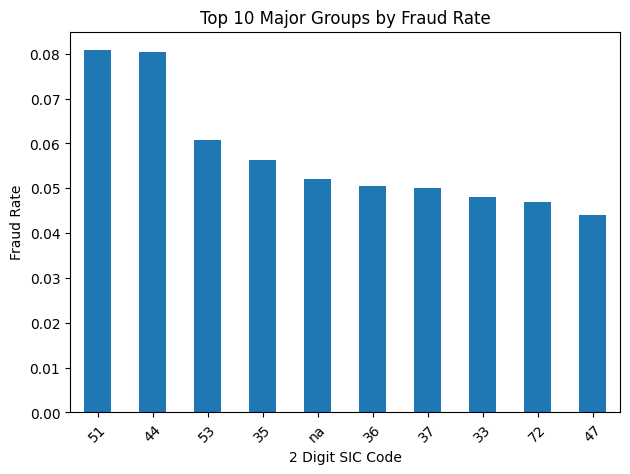

In [281]:
agg2.sort_values('fraud_rate', ascending=False).head(10)['fraud_rate'].plot(kind='bar', color='tab:blue')

plt.title("Top 10 Major Groups by Fraud Rate")
plt.xlabel("2 Digit SIC Code")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_2sic_rate.pdf", bbox_inches='tight')
plt.show()

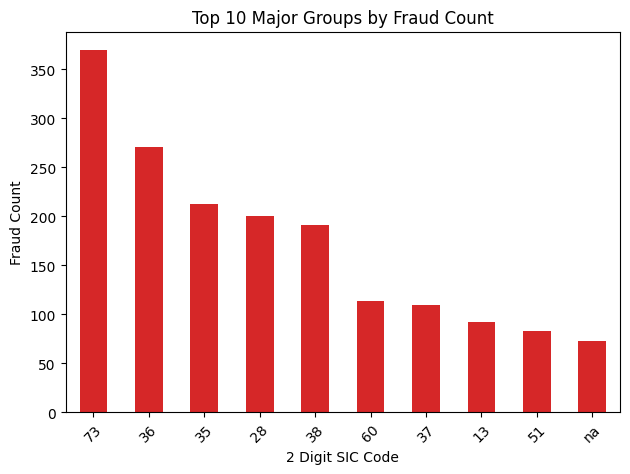

In [282]:
agg2.sort_values('fraud_count', ascending=False).head(10)['fraud_count'].plot(kind='bar', color='tab:red')

plt.title("Top 10 Major Groups by Fraud Count")
plt.xlabel("2 Digit SIC Code")
plt.ylabel("Fraud Count")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_2sic_count.pdf", bbox_inches='tight')
plt.show()

### Fraud SIC 1 Digit

In [261]:
# 1) Group by SIC division and compute fraud counts + totals
agg_div = (
    df
    .groupby('sic_division')['fraudulent']
    .agg(
        fraud_count='sum',
        total_count='count'
    )
)

# 2) Compute fraud rate
agg_div['fraud_rate'] = agg_div['fraud_count'] / agg_div['total_count']

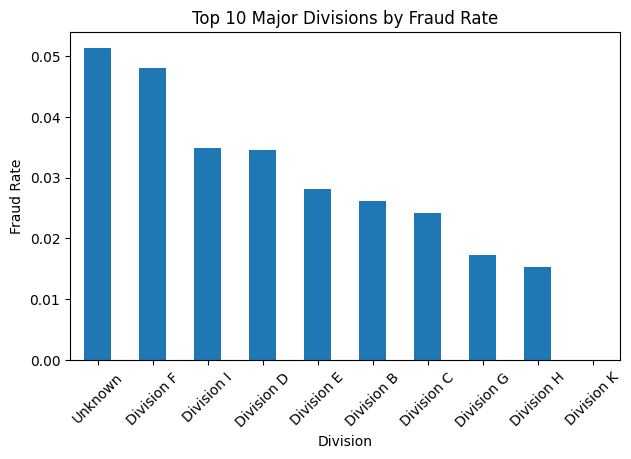

In [283]:
agg_div.sort_values('fraud_rate', ascending=False).head(10)['fraud_rate'].plot(kind='bar', color='tab:blue')

plt.title("Top 10 Major Divisions by Fraud Rate")
plt.xlabel("Division")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_divsic_rate.pdf", bbox_inches='tight')
plt.show()

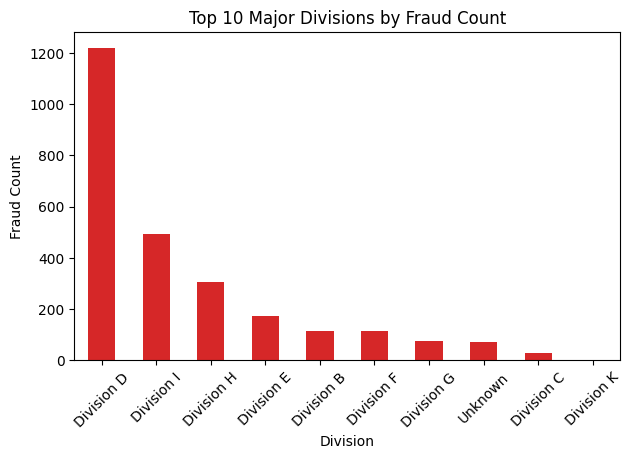

In [284]:
agg_div.sort_values('fraud_count', ascending=False).head(10)['fraud_count'].plot(kind='bar', color='tab:red')

plt.title("Top 10 Major Divisions by Fraud Count")
plt.xlabel("Division")
plt.ylabel("Fraud Count")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_divsic_count.pdf", bbox_inches='tight')
plt.show()

### fraud geography

### Fraud state and region

In [264]:
# Step 1: Compute fraud stats by state
state_fraud_rate = (
    df
    .groupby('state')['fraudulent']
    .agg(
        fraud_count='sum',
        total_count='count'
    )
)
state_fraud_rate['fraud_rate'] = state_fraud_rate['fraud_count'] / state_fraud_rate['total_count']

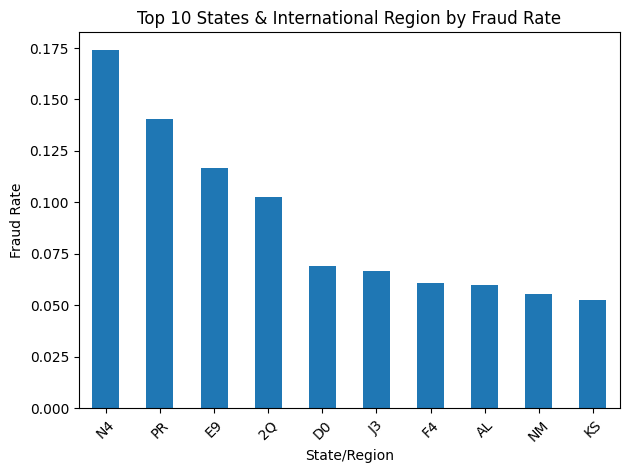

In [285]:
state_fraud_rate.sort_values('fraud_rate', ascending=False).head(10)['fraud_rate'].plot(kind='bar', color='tab:blue')

plt.title("Top 10 States & International Region by Fraud Rate")
plt.xlabel("State/Region")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_state_rate.pdf", bbox_inches='tight')
plt.show()

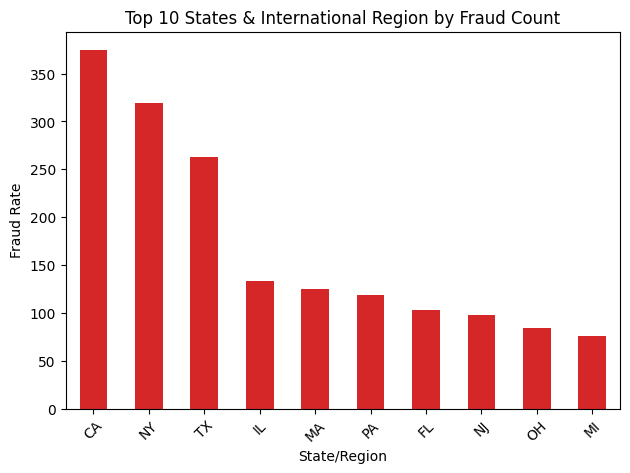

In [286]:
state_fraud_rate.sort_values('fraud_count', ascending=False).head(10)['fraud_count'].plot(kind='bar', color='tab:red')

plt.title("Top 10 States & International Region by Fraud Count")
plt.xlabel("State/Region")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_state_count.pdf", bbox_inches='tight')
plt.show()

### Fraud City

In [268]:
# Step 1: Compute fraud stats by city
city_fraud_rate = (
    df
    .groupby('city')['fraudulent']
    .agg(
        fraud_count='sum',
        total_count='count'
    )
)

city_fraud_rate['fraud_rate'] = city_fraud_rate['fraud_count'] / city_fraud_rate['total_count']

In [269]:
city_fraud_rate.sort_values('fraud_rate', ascending=False).head(10)

,fraud_count,total_count,fraud_rate
city,,,
SANTA FE,3,3,1.0
STRATFORD,3,3,1.0
"XIAN, SHAANXI PROVINCE",12,12,1.0
GREEN VALLEY (HENDER,3,3,1.0
PEAPACK,3,3,1.0
PEMROKE HM 08 BERMU,2,2,1.0
PEMROKE HM 08 BERMU,17,17,1.0
LAS VEGA,4,4,1.0
WESTMONT,2,2,1.0


In [270]:
# Step 2: Filter for cities with at least 10 filings for fraud rate
eligible_cities = city_fraud_rate[city_fraud_rate['total_count'] >= 10]

# Step 3: Get top 10 by fraud rate and top 10 by fraud count (no filter for count side)
top_cities_by_rate = eligible_cities.sort_values('fraud_rate', ascending=False).head(10)
top_cities_by_count = city_fraud_rate.sort_values('fraud_count', ascending=False).head(10)

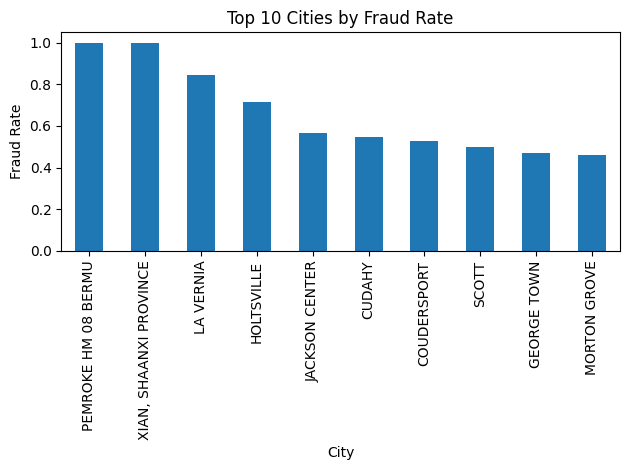

In [ ]:
top_cities_by_rate['fraud_rate'].plot(kind='bar', color='tab:blue')

plt.title("Top 10 Cities by Fraud Rate")
plt.xlabel("City")
plt.ylabel("Fraud Rate")
plt.tight_layout()
# plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_city_rate.pdf", bbox_inches='tight')
plt.show()

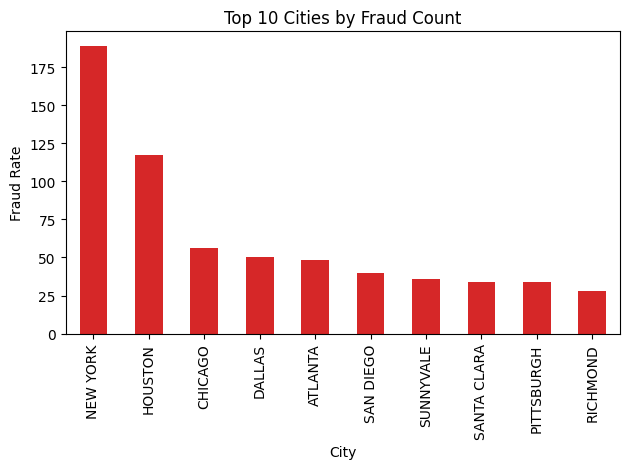

In [293]:
top_cities_by_count['fraud_count'].plot(kind='bar', color='tab:red')

plt.title("Top 10 Cities by Fraud Count")
plt.xlabel("City")
plt.ylabel("Fraud Rate")
plt.tight_layout()
# plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_city_count.pdf", bbox_inches='tight')
plt.show()

### Fraud incorp states

In [273]:
incorp_state_fraud = (
    df
    .groupby('incorp_state')['fraudulent']
    .agg(
        fraud_count='sum',
        total_count='count'
    )
)
incorp_state_fraud['fraud_rate'] = incorp_state_fraud['fraud_count'] / incorp_state_fraud['total_count']

In [274]:
incorp_state_fraud.sort_values('fraud_rate', ascending=False).head(10)

,fraud_count,total_count,fraud_rate
incorp_state,,,
A3,5,27,0.185185
KS,8,55,0.145455
PR,17,117,0.145299
A8,3,24,0.125000
V8,12,101,0.118812
IL,32,423,0.075650
LA,15,215,0.069767
TN,28,501,0.055888
E9,33,615,0.053659


In [275]:
# Step 2: Filter for states with at least 10 filings (for fraud rate chart only)
eligible_incorp_states = incorp_state_fraud[incorp_state_fraud['total_count'] >= 10]

# Step 3: Get top 10 by fraud rate and top 10 by fraud count
top_incorp_by_rate = eligible_incorp_states.sort_values('fraud_rate', ascending=False).head(10)
top_incorp_by_count = incorp_state_fraud.sort_values('fraud_count', ascending=False).head(10)

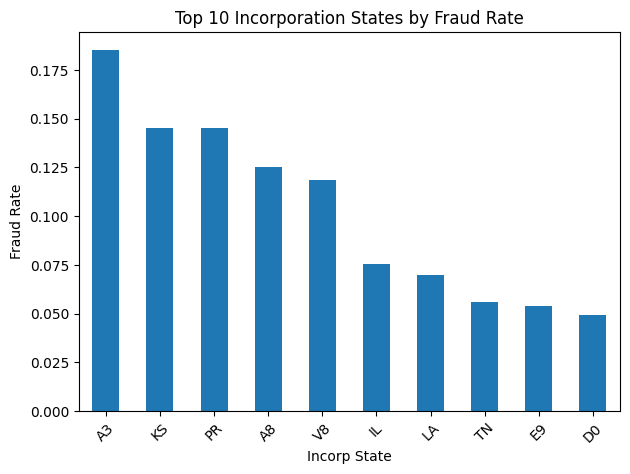

In [290]:
top_incorp_by_rate['fraud_rate'].plot(kind='bar', color='tab:blue')

plt.title("Top 10 Incorporation States by Fraud Rate")
plt.xlabel("Incorp State")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_incorp_rate.pdf", bbox_inches='tight')
plt.show()

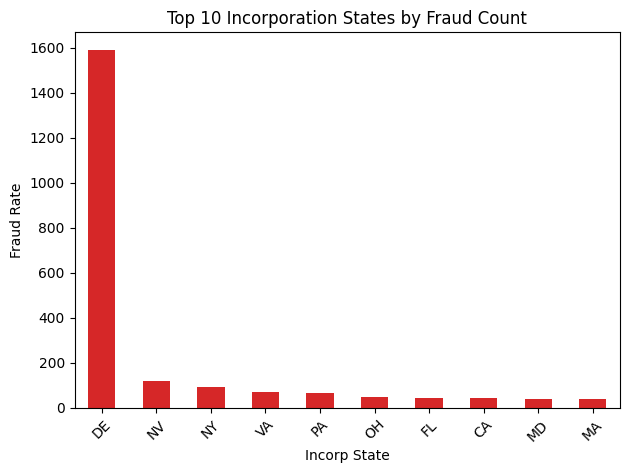

In [291]:
top_incorp_by_count['fraud_count'].plot(kind='bar', color='tab:red')

plt.title("Top 10 Incorporation States by Fraud Count")
plt.xlabel("Incorp State")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("/Users/malla/Uni/MA/MA-report/figures/fraud_incorp_count.pdf", bbox_inches='tight')
plt.show()

In [292]:
gc.collect()

30191

## Modern-BERT fine tuning results
this contains the calculations contained in the tables that compare the metrics on the different test sets after fine tuning Modern-BERT with different configurations and valdidation sets

### Modern-Bert sequence input length of 512 and stationary validation set

In [11]:
f1_macros = [0.5799, 0.6150, 0.5689, 0.5440, 0.5637, 0.5994, 0.5558, 0.6179, 0.5551, 0.5444, 0.5323, 0.5389]

n = len(f1_macros)
matrix = np.zeros((n, n))

# Fill diagonal
np.fill_diagonal(matrix, f1_macros)

# Fill symmetric off-diagonals
for i in range(n):
    for j in range(i + 1, n):
        diff = f1_macros[i] - f1_macros[j]
        matrix[i, j] = diff
        matrix[j, i] = diff  # same value copied

matrix = np.round(matrix, 4)
df = pd.DataFrame(matrix)
print(df)

        0       1       2       3       4       5       6       7       8   \
0   0.5799 -0.0351  0.0110  0.0359  0.0162 -0.0195  0.0241 -0.0380  0.0248   
1  -0.0351  0.6150  0.0461  0.0710  0.0513  0.0156  0.0592 -0.0029  0.0599   
2   0.0110  0.0461  0.5689  0.0249  0.0052 -0.0305  0.0131 -0.0490  0.0138   
3   0.0359  0.0710  0.0249  0.5440 -0.0197 -0.0554 -0.0118 -0.0739 -0.0111   
4   0.0162  0.0513  0.0052 -0.0197  0.5637 -0.0357  0.0079 -0.0542  0.0086   
5  -0.0195  0.0156 -0.0305 -0.0554 -0.0357  0.5994  0.0436 -0.0185  0.0443   
6   0.0241  0.0592  0.0131 -0.0118  0.0079  0.0436  0.5558 -0.0621  0.0007   
7  -0.0380 -0.0029 -0.0490 -0.0739 -0.0542 -0.0185 -0.0621  0.6179  0.0628   
8   0.0248  0.0599  0.0138 -0.0111  0.0086  0.0443  0.0007  0.0628  0.5551   
9   0.0355  0.0706  0.0245 -0.0004  0.0193  0.0550  0.0114  0.0735  0.0107   
10  0.0476  0.0827  0.0366  0.0117  0.0314  0.0671  0.0235  0.0856  0.0228   
11  0.0410  0.0761  0.0300  0.0051  0.0248  0.0605  0.0169  0.07

In [3]:
precision_0 = [0.9713, 0.9805, 0.9758, 0.9747, 0.9711, 0.9776, 0.9762, 0.9854, 0.9828, 0.9847, 0.9811, 0.9839]

n = len(precision_0)
matrix = np.zeros((n, n))

# Fill diagonal
np.fill_diagonal(matrix, precision_0)

# Fill symmetric off-diagonals
for i in range(n):
    for j in range(i + 1, n):
        diff = precision_0[i] - precision_0[j]
        matrix[i, j] = diff
        matrix[j, i] = diff  # same value copied

matrix = np.round(matrix, 4)
df = pd.DataFrame(matrix)
print(df)

        0       1       2       3       4       5       6       7       8   \
0   0.9713 -0.0092 -0.0045 -0.0034  0.0002 -0.0063 -0.0049 -0.0141 -0.0115   
1  -0.0092  0.9805  0.0047  0.0058  0.0094  0.0029  0.0043 -0.0049 -0.0023   
2  -0.0045  0.0047  0.9758  0.0011  0.0047 -0.0018 -0.0004 -0.0096 -0.0070   
3  -0.0034  0.0058  0.0011  0.9747  0.0036 -0.0029 -0.0015 -0.0107 -0.0081   
4   0.0002  0.0094  0.0047  0.0036  0.9711 -0.0065 -0.0051 -0.0143 -0.0117   
5  -0.0063  0.0029 -0.0018 -0.0029 -0.0065  0.9776  0.0014 -0.0078 -0.0052   
6  -0.0049  0.0043 -0.0004 -0.0015 -0.0051  0.0014  0.9762 -0.0092 -0.0066   
7  -0.0141 -0.0049 -0.0096 -0.0107 -0.0143 -0.0078 -0.0092  0.9854  0.0026   
8  -0.0115 -0.0023 -0.0070 -0.0081 -0.0117 -0.0052 -0.0066  0.0026  0.9828   
9  -0.0134 -0.0042 -0.0089 -0.0100 -0.0136 -0.0071 -0.0085  0.0007 -0.0019   
10 -0.0098 -0.0006 -0.0053 -0.0064 -0.0100 -0.0035 -0.0049  0.0043  0.0017   
11 -0.0126 -0.0034 -0.0081 -0.0092 -0.0128 -0.0063 -0.0077  0.00

In [4]:
precision_1 = [0.1833, 0.1981, 0.1538, 0.1053, 0.2917, 0.2895, 0.1667, 0.2553, 0.1228, 0.0886, 0.1579, 0.1143]

n = len(precision_1)
matrix = np.zeros((n, n))

# Fill diagonal
np.fill_diagonal(matrix, precision_1)

# Fill symmetric off-diagonals
for i in range(n):
    for j in range(i + 1, n):
        diff = precision_1[i] - precision_1[j]
        matrix[i, j] = diff
        matrix[j, i] = diff  # same value copied

matrix = np.round(matrix, 4)
df = pd.DataFrame(matrix)
print(df)

        0       1       2       3       4       5       6       7       8   \
0   0.1833 -0.0148  0.0295  0.0780 -0.1084 -0.1062  0.0166 -0.0720  0.0605   
1  -0.0148  0.1981  0.0443  0.0928 -0.0936 -0.0914  0.0314 -0.0572  0.0753   
2   0.0295  0.0443  0.1538  0.0485 -0.1379 -0.1357 -0.0129 -0.1015  0.0310   
3   0.0780  0.0928  0.0485  0.1053 -0.1864 -0.1842 -0.0614 -0.1500 -0.0175   
4  -0.1084 -0.0936 -0.1379 -0.1864  0.2917  0.0022  0.1250  0.0364  0.1689   
5  -0.1062 -0.0914 -0.1357 -0.1842  0.0022  0.2895  0.1228  0.0342  0.1667   
6   0.0166  0.0314 -0.0129 -0.0614  0.1250  0.1228  0.1667 -0.0886  0.0439   
7  -0.0720 -0.0572 -0.1015 -0.1500  0.0364  0.0342 -0.0886  0.2553  0.1325   
8   0.0605  0.0753  0.0310 -0.0175  0.1689  0.1667  0.0439  0.1325  0.1228   
9   0.0947  0.1095  0.0652  0.0167  0.2031  0.2009  0.0781  0.1667  0.0342   
10  0.0254  0.0402 -0.0041 -0.0526  0.1338  0.1316  0.0088  0.0974 -0.0351   
11  0.0690  0.0838  0.0395 -0.0090  0.1774  0.1752  0.0524  0.14

In [5]:
recall_0 = [0.9689, 0.9482, 0.9719, 0.9678, 0.9923, 0.9885, 0.9855, 0.9861, 0.9809, 0.9741, 0.9945, 0.9898]

n = len(recall_0)
matrix = np.zeros((n, n))

# Fill diagonal
np.fill_diagonal(matrix, recall_0)

# Fill symmetric off-diagonals
for i in range(n):
    for j in range(i + 1, n):
        diff = recall_0[i] - recall_0[j]
        matrix[i, j] = diff
        matrix[j, i] = diff  # same value copied

matrix = np.round(matrix, 4)
df = pd.DataFrame(matrix)
print(df)

        0       1       2       3       4       5       6       7       8   \
0   0.9689  0.0207 -0.0030  0.0011 -0.0234 -0.0196 -0.0166 -0.0172 -0.0120   
1   0.0207  0.9482 -0.0237 -0.0196 -0.0441 -0.0403 -0.0373 -0.0379 -0.0327   
2  -0.0030 -0.0237  0.9719  0.0041 -0.0204 -0.0166 -0.0136 -0.0142 -0.0090   
3   0.0011 -0.0196  0.0041  0.9678 -0.0245 -0.0207 -0.0177 -0.0183 -0.0131   
4  -0.0234 -0.0441 -0.0204 -0.0245  0.9923  0.0038  0.0068  0.0062  0.0114   
5  -0.0196 -0.0403 -0.0166 -0.0207  0.0038  0.9885  0.0030  0.0024  0.0076   
6  -0.0166 -0.0373 -0.0136 -0.0177  0.0068  0.0030  0.9855 -0.0006  0.0046   
7  -0.0172 -0.0379 -0.0142 -0.0183  0.0062  0.0024 -0.0006  0.9861  0.0052   
8  -0.0120 -0.0327 -0.0090 -0.0131  0.0114  0.0076  0.0046  0.0052  0.9809   
9  -0.0052 -0.0259 -0.0022 -0.0063  0.0182  0.0144  0.0114  0.0120  0.0068   
10 -0.0256 -0.0463 -0.0226 -0.0267 -0.0022 -0.0060 -0.0090 -0.0084 -0.0136   
11 -0.0209 -0.0416 -0.0179 -0.0220  0.0025 -0.0013 -0.0043 -0.00

In [6]:
recall_1 = [0.1964, 0.4038, 0.1754, 0.1311, 0.0972, 0.1719, 0.1077, 0.2449, 0.1346, 0.1429, 0.0508, 0.0755]

n = len(recall_1)
matrix = np.zeros((n, n))

# Fill diagonal
np.fill_diagonal(matrix, recall_1)

# Fill symmetric off-diagonals
for i in range(n):
    for j in range(i + 1, n):
        diff = recall_1[i] - recall_1[j]
        matrix[i, j] = diff
        matrix[j, i] = diff  # same value copied

matrix = np.round(matrix, 4)
df = pd.DataFrame(matrix)
print(df)

        0       1       2       3       4       5       6       7       8   \
0   0.1964 -0.2074  0.0210  0.0653  0.0992  0.0245  0.0887 -0.0485  0.0618   
1  -0.2074  0.4038  0.2284  0.2727  0.3066  0.2319  0.2961  0.1589  0.2692   
2   0.0210  0.2284  0.1754  0.0443  0.0782  0.0035  0.0677 -0.0695  0.0408   
3   0.0653  0.2727  0.0443  0.1311  0.0339 -0.0408  0.0234 -0.1138 -0.0035   
4   0.0992  0.3066  0.0782  0.0339  0.0972 -0.0747 -0.0105 -0.1477 -0.0374   
5   0.0245  0.2319  0.0035 -0.0408 -0.0747  0.1719  0.0642 -0.0730  0.0373   
6   0.0887  0.2961  0.0677  0.0234 -0.0105  0.0642  0.1077 -0.1372 -0.0269   
7  -0.0485  0.1589 -0.0695 -0.1138 -0.1477 -0.0730 -0.1372  0.2449  0.1103   
8   0.0618  0.2692  0.0408 -0.0035 -0.0374  0.0373 -0.0269  0.1103  0.1346   
9   0.0535  0.2609  0.0325 -0.0118 -0.0457  0.0290 -0.0352  0.1020 -0.0083   
10  0.1456  0.3530  0.1246  0.0803  0.0464  0.1211  0.0569  0.1941  0.0838   
11  0.1209  0.3283  0.0999  0.0556  0.0217  0.0964  0.0322  0.16

### Modern-Bert sequence input length of 512 and stationary validation set

In [10]:
f1_macros = [0.5322, 0.6202, 0.5314, 0.5387, 0.5595, 0.5471, 0.5857,
             0.5644, 0.5903, 0.5947, 0.5181, 0.5448]

n = len(f1_macros)
matrix = np.zeros((n, n))

# Fill diagonal
np.fill_diagonal(matrix, f1_macros)

# Fill symmetric off-diagonals
for i in range(n):
    for j in range(i + 1, n):
        diff = f1_macros[i] - f1_macros[j]
        matrix[i, j] = diff
        matrix[j, i] = diff  # same value copied

matrix = np.round(matrix, 4)
df = pd.DataFrame(matrix)
print(df)

        0       1       2       3       4       5       6       7       8   \
0   0.5322 -0.0880  0.0008 -0.0065 -0.0273 -0.0149 -0.0535 -0.0322 -0.0581   
1  -0.0880  0.6202  0.0888  0.0815  0.0607  0.0731  0.0345  0.0558  0.0299   
2   0.0008  0.0888  0.5314 -0.0073 -0.0281 -0.0157 -0.0543 -0.0330 -0.0589   
3  -0.0065  0.0815 -0.0073  0.5387 -0.0208 -0.0084 -0.0470 -0.0257 -0.0516   
4  -0.0273  0.0607 -0.0281 -0.0208  0.5595  0.0124 -0.0262 -0.0049 -0.0308   
5  -0.0149  0.0731 -0.0157 -0.0084  0.0124  0.5471 -0.0386 -0.0173 -0.0432   
6  -0.0535  0.0345 -0.0543 -0.0470 -0.0262 -0.0386  0.5857  0.0213 -0.0046   
7  -0.0322  0.0558 -0.0330 -0.0257 -0.0049 -0.0173  0.0213  0.5644 -0.0259   
8  -0.0581  0.0299 -0.0589 -0.0516 -0.0308 -0.0432 -0.0046 -0.0259  0.5903   
9  -0.0625  0.0255 -0.0633 -0.0560 -0.0352 -0.0476 -0.0090 -0.0303 -0.0044   
10  0.0141  0.1021  0.0133  0.0206  0.0414  0.0290  0.0676  0.0463  0.0722   
11 -0.0126  0.0754 -0.0134 -0.0061  0.0147  0.0023  0.0409  0.01

In [15]:
precision_0 = [0.9704, 0.9768, 0.9740, 0.9735, 0.9711, 0.9752, 0.9771, 0.9828, 0.9830, 0.9856, 0.9807, 0.9840]

n = len(precision_0)
matrix = np.zeros((n, n))

# Fill diagonal
np.fill_diagonal(matrix, precision_0)

# Fill symmetric off-diagonals
for i in range(n):
    for j in range(i + 1, n):
        diff = precision_0[i] - precision_0[j]
        matrix[i, j] = diff
        matrix[j, i] = diff  # same value copied

matrix = np.round(matrix, 4)
df = pd.DataFrame(matrix)
print(df)

        0       1       2       3       4       5       6       7       8   \
0   0.9704 -0.0064 -0.0036 -0.0031 -0.0007 -0.0048 -0.0067 -0.0124 -0.0126   
1  -0.0064  0.9768  0.0028  0.0033  0.0057  0.0016 -0.0003 -0.0060 -0.0062   
2  -0.0036  0.0028  0.9740  0.0005  0.0029 -0.0012 -0.0031 -0.0088 -0.0090   
3  -0.0031  0.0033  0.0005  0.9735  0.0024 -0.0017 -0.0036 -0.0093 -0.0095   
4  -0.0007  0.0057  0.0029  0.0024  0.9711 -0.0041 -0.0060 -0.0117 -0.0119   
5  -0.0048  0.0016 -0.0012 -0.0017 -0.0041  0.9752 -0.0019 -0.0076 -0.0078   
6  -0.0067 -0.0003 -0.0031 -0.0036 -0.0060 -0.0019  0.9771 -0.0057 -0.0059   
7  -0.0124 -0.0060 -0.0088 -0.0093 -0.0117 -0.0076 -0.0057  0.9828 -0.0002   
8  -0.0126 -0.0062 -0.0090 -0.0095 -0.0119 -0.0078 -0.0059 -0.0002  0.9830   
9  -0.0152 -0.0088 -0.0116 -0.0121 -0.0145 -0.0104 -0.0085 -0.0028 -0.0026   
10 -0.0103 -0.0039 -0.0067 -0.0072 -0.0096 -0.0055 -0.0036  0.0021  0.0023   
11 -0.0136 -0.0072 -0.0100 -0.0105 -0.0129 -0.0088 -0.0069 -0.00

In [19]:
precision_1 = [0.0845, 0.2593, 0.0795, 0.1739, 0.2414, 0.1923, 0.2903, 0.2273, 0.3333, 0.2250, 0.0909, 0.1538]

n = len(precision_1)
matrix = np.zeros((n, n))

# Fill diagonal
np.fill_diagonal(matrix, precision_1)

# Fill symmetric off-diagonals
for i in range(n):
    for j in range(i + 1, n):
        diff = precision_1[i] - precision_1[j]
        matrix[i, j] = diff
        matrix[j, i] = diff  # same value copied

matrix = np.round(matrix, 4)
df = pd.DataFrame(matrix)
print(df)

        0       1       2       3       4       5       6       7       8   \
0   0.0845 -0.1748  0.0050 -0.0894 -0.1569 -0.1078 -0.2058 -0.1428 -0.2488   
1  -0.1748  0.2593  0.1798  0.0854  0.0179  0.0670 -0.0310  0.0320 -0.0740   
2   0.0050  0.1798  0.0795 -0.0944 -0.1619 -0.1128 -0.2108 -0.1478 -0.2538   
3  -0.0894  0.0854 -0.0944  0.1739 -0.0675 -0.0184 -0.1164 -0.0534 -0.1594   
4  -0.1569  0.0179 -0.1619 -0.0675  0.2414  0.0491 -0.0489  0.0141 -0.0919   
5  -0.1078  0.0670 -0.1128 -0.0184  0.0491  0.1923 -0.0980 -0.0350 -0.1410   
6  -0.2058 -0.0310 -0.2108 -0.1164 -0.0489 -0.0980  0.2903  0.0630 -0.0430   
7  -0.1428  0.0320 -0.1478 -0.0534  0.0141 -0.0350  0.0630  0.2273 -0.1060   
8  -0.2488 -0.0740 -0.2538 -0.1594 -0.0919 -0.1410 -0.0430 -0.1060  0.3333   
9  -0.1405  0.0343 -0.1455 -0.0511  0.0164 -0.0327  0.0653  0.0023  0.1083   
10 -0.0064  0.1684 -0.0114  0.0830  0.1505  0.1014  0.1994  0.1364  0.2424   
11 -0.0693  0.1055 -0.0743  0.0201  0.0876  0.0385  0.1365  0.07

In [20]:
recall_0 = [0.9174, 0.9756, 0.9585, 0.9910, 0.9900, 0.9910, 0.9909, 0.9933, 0.9947, 0.9888, 0.9931, 0.9927]

n = len(recall_0)
matrix = np.zeros((n, n))

# Fill diagonal
np.fill_diagonal(matrix, recall_0)

# Fill symmetric off-diagonals
for i in range(n):
    for j in range(i + 1, n):
        diff = recall_0[i] - recall_0[j]
        matrix[i, j] = diff
        matrix[j, i] = diff  # same value copied

matrix = np.round(matrix, 4)
df = pd.DataFrame(matrix)
print(df)

        0       1       2       3       4       5       6       7       8   \
0   0.9174 -0.0582 -0.0411 -0.0736 -0.0726 -0.0736 -0.0735 -0.0759 -0.0773   
1  -0.0582  0.9756  0.0171 -0.0154 -0.0144 -0.0154 -0.0153 -0.0177 -0.0191   
2  -0.0411  0.0171  0.9585 -0.0325 -0.0315 -0.0325 -0.0324 -0.0348 -0.0362   
3  -0.0736 -0.0154 -0.0325  0.9910  0.0010  0.0000  0.0001 -0.0023 -0.0037   
4  -0.0726 -0.0144 -0.0315  0.0010  0.9900 -0.0010 -0.0009 -0.0033 -0.0047   
5  -0.0736 -0.0154 -0.0325  0.0000 -0.0010  0.9910  0.0001 -0.0023 -0.0037   
6  -0.0735 -0.0153 -0.0324  0.0001 -0.0009  0.0001  0.9909 -0.0024 -0.0038   
7  -0.0759 -0.0177 -0.0348 -0.0023 -0.0033 -0.0023 -0.0024  0.9933 -0.0014   
8  -0.0773 -0.0191 -0.0362 -0.0037 -0.0047 -0.0037 -0.0038 -0.0014  0.9947   
9  -0.0714 -0.0132 -0.0303  0.0022  0.0012  0.0022  0.0021  0.0045  0.0059   
10 -0.0757 -0.0175 -0.0346 -0.0021 -0.0031 -0.0021 -0.0022  0.0002  0.0016   
11 -0.0753 -0.0171 -0.0342 -0.0017 -0.0027 -0.0017 -0.0018  0.00

In [23]:
recall_1 = [0.2143, 0.2692, 0.1228, 0.0656, 0.0972, 0.0781 ,0.1385 , 0.1020, 0.1346, 0.1837, 0.0339, 0.0755]

n = len(recall_1)
matrix = np.zeros((n, n))

# Fill diagonal
np.fill_diagonal(matrix, recall_1)

# Fill symmetric off-diagonals
for i in range(n):
    for j in range(i + 1, n):
        diff = recall_1[i] - recall_1[j]
        matrix[i, j] = diff
        matrix[j, i] = diff  # same value copied

matrix = np.round(matrix, 4)
df = pd.DataFrame(matrix)
print(df)

        0       1       2       3       4       5       6       7       8   \
0   0.2143 -0.0549  0.0915  0.1487  0.1171  0.1362  0.0758  0.1123  0.0797   
1  -0.0549  0.2692  0.1464  0.2036  0.1720  0.1911  0.1307  0.1672  0.1346   
2   0.0915  0.1464  0.1228  0.0572  0.0256  0.0447 -0.0157  0.0208 -0.0118   
3   0.1487  0.2036  0.0572  0.0656 -0.0316 -0.0125 -0.0729 -0.0364 -0.0690   
4   0.1171  0.1720  0.0256 -0.0316  0.0972  0.0191 -0.0413 -0.0048 -0.0374   
5   0.1362  0.1911  0.0447 -0.0125  0.0191  0.0781 -0.0604 -0.0239 -0.0565   
6   0.0758  0.1307 -0.0157 -0.0729 -0.0413 -0.0604  0.1385  0.0365  0.0039   
7   0.1123  0.1672  0.0208 -0.0364 -0.0048 -0.0239  0.0365  0.1020 -0.0326   
8   0.0797  0.1346 -0.0118 -0.0690 -0.0374 -0.0565  0.0039 -0.0326  0.1346   
9   0.0306  0.0855 -0.0609 -0.1181 -0.0865 -0.1056 -0.0452 -0.0817 -0.0491   
10  0.1804  0.2353  0.0889  0.0317  0.0633  0.0442  0.1046  0.0681  0.1007   
11  0.1388  0.1937  0.0473 -0.0099  0.0217  0.0026  0.0630  0.02